Activists have asserted that there is a strong gender bias in student evaluations of professors, with 
male professors enjoying a boost in rating from this bias. While this has been celebrated by ideologues, 
skeptics have pointed out that this research is of technically poor quality, either due to a low sample 
size – as small as n = 1 (Mitchell & Martin, 2018), failure to control for confounders such as teaching 
experience (Centra & Gaubatz, 2000) or obvious p-hacking (MacNell et al., 2015). We would like you to 
answer the question whether there is evidence of a pro-male gender bias in this dataset.  
Hint: A significance test is probably required.


The columns represent the following information, in order:
1. Average Rating (the arithmetic mean of all individual quality ratings of this professor)
2. Average Difficulty (the arithmetic mean of all individual difficulty ratings of this professor)
3. Number of ratings (simply the total number of ratings these averages are based on)
4. Received a “pepper”? (Boolean - was this professor judged as “hot” by the students?)
5. The proportion of students that said they would take the class again
6. The number of ratings coming from online classes
7. Male gender (Boolean – 1: determined with high confidence that professor is male)
8. Female (Boolean – 1: determined with high confidence that professor is female)


In [259]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import KFold  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
seed = 10676128

Q7. Build a regression model predicting average rating from all numerical predictors (the ones in the rmpCapstoneNum.csv) file. Make sure to include the R2 and RMSE of this model. Which of these factors is most strongly predictive of average rating? Hint: Make sure to address collinearity concerns

In [260]:
df_capstone = pd.read_csv('./rmpCapstoneNum.csv', header=None)
df_capstone.columns = ['Average Rating', 'Average Difficulty', 'Number of ratings', 'Received a pepper', 
                       'Proportion of students that said they would take the class again', 
                       'Number of ratings coming from online classes', 'Male Professor', 'Female Professor']

In [261]:
df_capstone=df_capstone[df_capstone['Number of ratings'] >= 10]

In [262]:
df_capstone.isna().sum()

Average Rating                                                         0
Average Difficulty                                                     0
Number of ratings                                                      0
Received a pepper                                                      0
Proportion of students that said they would take the class again    1638
Number of ratings coming from online classes                           0
Male Professor                                                         0
Female Professor                                                       0
dtype: int64

In [263]:
df_capstone_na_dropped=df_capstone.dropna()

In [264]:
df_capstone_na_dropped['Proportion of online class ratings'] = df_capstone_na_dropped['Number of ratings coming from online classes'].div(df_capstone_na_dropped['Number of ratings'])

/var/folders/g3/nf_q_x0d0q3_12n_qrkr73m80000gn/T/ipykernel_47146/2430706669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_capstone_na_dropped['Proportion of online class ratings'] = df_capstone_na_dropped['Number of ratings coming from online classes'].div(df_capstone_na_dropped['Number of ratings'])


In [265]:
df_capstone_na_dropped

Average Rating  Average Difficulty  Number of ratings  \
5                 3.5                 3.3               22.0   
25                4.3                 3.3               16.0   
40                1.8                 3.8               15.0   
42                4.1                 3.3               21.0   
46                4.2                 1.8               26.0   
...               ...                 ...                ...   
89810             3.4                 3.4               14.0   
89855             4.0                 1.9               11.0   
89866             4.4                 3.6               14.0   
89875             2.8                 2.9               16.0   
89877             3.6                 3.4               10.0   

       Received a pepper  \
5                    0.0   
25                   1.0   
40                   0.0   
42                   0.0   
46                   1.0   
...                  ...   
89810                0.0   
89855                1.0   
89866                1.0   
89875                0.0   
89877                0.0   

       Proportion of students that said they would take the class again  \
5                                                   56.0                  
25                                                  83.0                  
40                                                  22.0                  
42                                                  67.0                  
46                                                  57.0                  
...                                                  ...                  
89810                                               54.0                  
89855                                               60.0                  
89866                                               88.0                  
89875                                               40.0                  
89877                                               50.0                  

       Number of ratings coming from online classes  Male Professor  \
5                                               7.0               1   
25                                              0.0               0   
40                                              1.0               0   
42                                              0.0               0   
46                                              8.0               1   
...                                             ...             ...   
89810                                           5.0               1   
89855                                           0.0               1   
89866                                           0.0               0   
89875                                          13.0               0   
89877                                           1.0               1   

       Female Professor  Proportion of online class ratings  
5                     0                            0.318182  
25                    1                            0.000000  
40                    1                            0.066667  
42                    1                            0.000000  
46                    0                            0.307692  
...                 ...                                 ...  
89810                 0                            0.357143  
89855                 0                            0.000000  
89866                 1                            0.000000  
89875                 0                            0.812500  
89877                 0                            0.100000  

[8203 rows x 9 columns]

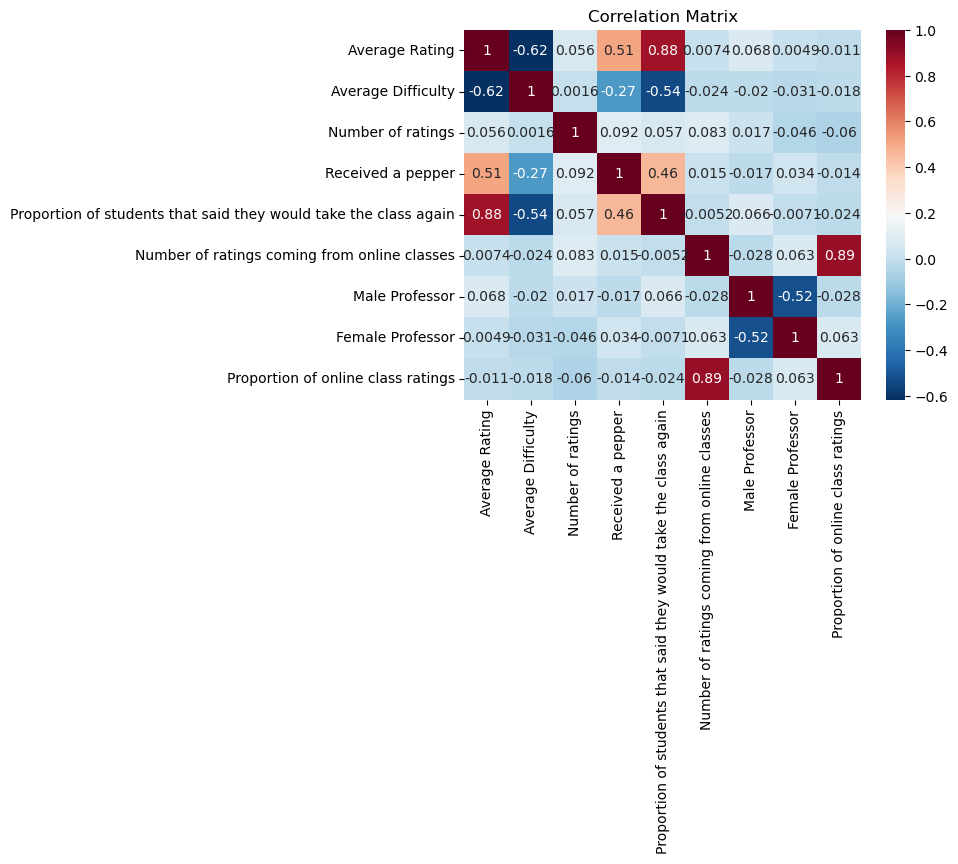

In [266]:
correlation_matrix = df_capstone_na_dropped.corr()

sns.heatmap(correlation_matrix,cmap = "RdBu_r", annot=True)
plt.title('Correlation Matrix')
plt.show()

In [267]:
df_capstone_dropped_final=df_capstone_na_dropped

In [268]:
df_capstone_dropped_final=df_capstone_dropped_final[(df_capstone_dropped_final['Male Professor']==1) & (df_capstone_dropped_final['Female Professor']==0) | (df_capstone_dropped_final['Male Professor']==0) & (df_capstone_dropped_final['Female Professor']==1)]

In [269]:
df_capstone_dropped_final

Average Rating  Average Difficulty  Number of ratings  \
5                 3.5                 3.3               22.0   
25                4.3                 3.3               16.0   
40                1.8                 3.8               15.0   
42                4.1                 3.3               21.0   
46                4.2                 1.8               26.0   
...               ...                 ...                ...   
89801             4.8                 2.8               13.0   
89810             3.4                 3.4               14.0   
89855             4.0                 1.9               11.0   
89866             4.4                 3.6               14.0   
89877             3.6                 3.4               10.0   

       Received a pepper  \
5                    0.0   
25                   1.0   
40                   0.0   
42                   0.0   
46                   1.0   
...                  ...   
89801                1.0   
89810                0.0   
89855                1.0   
89866                1.0   
89877                0.0   

       Proportion of students that said they would take the class again  \
5                                                   56.0                  
25                                                  83.0                  
40                                                  22.0                  
42                                                  67.0                  
46                                                  57.0                  
...                                                  ...                  
89801                                              100.0                  
89810                                               54.0                  
89855                                               60.0                  
89866                                               88.0                  
89877                                               50.0                  

       Number of ratings coming from online classes  Male Professor  \
5                                               7.0               1   
25                                              0.0               0   
40                                              1.0               0   
42                                              0.0               0   
46                                              8.0               1   
...                                             ...             ...   
89801                                           0.0               0   
89810                                           5.0               1   
89855                                           0.0               1   
89866                                           0.0               0   
89877                                           1.0               1   

       Female Professor  Proportion of online class ratings  
5                     0                            0.318182  
25                    1                            0.000000  
40                    1                            0.066667  
42                    1                            0.000000  
46                    0                            0.307692  
...                 ...                                 ...  
89801                 1                            0.000000  
89810                 0                            0.357143  
89855                 0                            0.000000  
89866                 1                            0.000000  
89877                 0                            0.100000  

[5963 rows x 9 columns]

In [270]:
def compute_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def compute_r2(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

def normal_regression(X_train, y_train):
    return np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

def ridge_regression(X_train, y_train, alpha):
    n_features = X_train.shape[1]
    identity = np.eye(n_features)
    identity[0, 0] = 0  
    return np.linalg.inv(X_train.T @ X_train + alpha * identity) @ X_train.T @ y_train

def lasso_regression(X_train, y_train, alpha, max_iter=10000, tol=1e-6):
    m, n = X_train.shape
    beta = np.zeros(n)
    for _ in range(max_iter):
        beta_old = beta.copy()
        for j in range(n):
            residual = y_train - X_train @ beta + X_train[:, j] * beta[j]
            rho = X_train[:, j].T @ residual
            if j == 0:  
                beta[j] = rho / (X_train[:, j].T @ X_train[:, j])
            else:
                beta[j] = np.sign(rho) * max(0, abs(rho) - alpha) / (X_train[:, j].T @ X_train[:, j])
        if np.max(np.abs(beta - beta_old)) < tol:
            break
    return beta

In [271]:
def getKFresults(X,y,alphas=np.array([0.00001,0.0001,0.001,0.01,0.1,1,2,5,10,20,100,1000,100000])):
    kf = KFold(n_splits=5, shuffle=True, random_state=seed)
    results = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        X_train_scaled = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
        X_val_scaled = np.hstack((np.ones((X_val_scaled.shape[0], 1)), X_val_scaled))

        # Normal Regression
        beta_normal = normal_regression(X_train_scaled, y_train)
        y_pred_normal = X_val_scaled @ beta_normal
        rmse_normal = compute_rmse(y_val, y_pred_normal)
        r2_normal = compute_r2(y_val, y_pred_normal)
        
        # Ridge Regression
        for alpha in alphas:
            beta_ridge = ridge_regression(X_train_scaled, y_train, alpha)
            y_pred_ridge = X_val_scaled @ beta_ridge
            rmse_ridge = compute_rmse(y_val, y_pred_ridge)
            r2_ridge = compute_r2(y_val, y_pred_ridge)
            results.append(('Ridge', alpha, rmse_ridge, r2_ridge))
        
        # Lasso Regression
        for alpha in alphas:
            beta_lasso = lasso_regression(X_train_scaled, y_train, alpha)
            y_pred_lasso = X_val_scaled @ beta_lasso
            rmse_lasso = compute_rmse(y_val, y_pred_lasso)
            r2_lasso = compute_r2(y_val, y_pred_lasso)
            results.append(('Lasso', alpha, rmse_lasso, r2_lasso))
        
        results.append(('Normal', None, rmse_normal, r2_normal))
    return results

In [362]:
def getfinalresults(X_train,y_train,X_test,y_test,alphas=np.array([0.00001,0.0001,0.001,0.01,0.1,1,2,5,10,20,100,1000,100000])):
    results = []

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
    X_test_scaled = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))

    # Normal Regression
    beta_normal = normal_regression(X_train_scaled, y_train)
    y_pred_normal = X_test_scaled @ beta_normal
    rmse_normal = compute_rmse(y_test, y_pred_normal)
    r2_normal = compute_r2(y_test, y_pred_normal)

    residuals = y_test - y_pred_normal

    ## Residual plot
    plt.figure(figsize=(10, 6))
    # Grab standardized residuals for plot
    std_residuals = (residuals - residuals.mean()) / residuals.std()
    plt.scatter(y_pred_normal, std_residuals, color='blue')
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Horizontal line at y=0

    # Labels and title
    plt.title("Residual Plot")
    plt.xlabel("Predicted Values (y_hat)")
    plt.ylabel("Standardized Residuals")

    plt.grid(True)
    plt.tight_layout()
    plt.show()

    ## Pretty even spread in the residuals (homoscedasticity? - check)
    fig, ax = plt.subplots(figsize=(10,6))

    # See histogram of residuals to check for normality
    ax.hist(residuals, bins=15, color='green', edgecolor='black', density=True) # Add density
    ax.set_title("Histogram of Residuals")
    ax.set_xlabel("Residuals")
    ax.set_ylabel("Density")
    
    # Ridge Regression
    for alpha in alphas:
        beta_ridge = ridge_regression(X_train_scaled, y_train, alpha)
        y_pred_ridge = X_test_scaled @ beta_ridge
        rmse_ridge = compute_rmse(y_test, y_pred_ridge)
        r2_ridge = compute_r2(y_test, y_pred_ridge)
        results.append(('Ridge', alpha, rmse_ridge, r2_ridge))
    
    # Lasso Regression
    for alpha in alphas:
        beta_lasso = lasso_regression(X_train_scaled, y_train, alpha)
        y_pred_lasso = X_test_scaled @ beta_lasso
        rmse_lasso = compute_rmse(y_test, y_pred_lasso)
        r2_lasso = compute_r2(y_test, y_pred_lasso)
        results.append(('Lasso', alpha, rmse_lasso, r2_lasso))
    
    results.append(('Normal', None, rmse_normal, r2_normal))
    return results

In [272]:
def getbetas(X_train,y_train,X_test,y_test):
    results=[]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
    X_test_scaled = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))

    # Normal Regression
    beta_normal = normal_regression(X_train_scaled, y_train)
    y_pred_normal = X_test_scaled @ beta_normal
    rmse_normal = compute_rmse(y_test, y_pred_normal)
    r2_normal = compute_r2(y_test, y_pred_normal)
    results.append(('Normal',beta_normal, rmse_normal, r2_normal))
    return beta_normal,rmse_normal,r2_normal



In [273]:
def getbetaslasso(X_train,y_train,X_test,y_test,alpha=10):
    results=[]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
    X_test_scaled = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))

    # Normal Regression
    beta_lasso = lasso_regression(X_train_scaled, y_train, alpha)
    y_pred_lasso = X_test_scaled @ beta_lasso
    rmse_lasso = compute_rmse(y_test, y_pred_lasso)
    r2_lasso = compute_r2(y_test, y_pred_lasso)
    results.append(('Lasso', beta_lasso, rmse_lasso, r2_lasso))
    return beta_lasso,rmse_lasso,r2_lasso

In [274]:
def getbetasridge(X_train,y_train,X_test,y_test,alpha=10):
    results=[]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
    X_test_scaled = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))

    # Normal Regression
    beta_ridge = ridge_regression(X_train_scaled, y_train, alpha)
    y_pred_ridge = X_test_scaled @ beta_ridge
    rmse_ridge = compute_rmse(y_test, y_pred_ridge)
    r2_ridge = compute_r2(y_test, y_pred_ridge)
    results.append(('ridge', beta_ridge, rmse_ridge, r2_ridge))
    return beta_ridge,rmse_ridge,r2_ridge

In [275]:
def plot_results(results_df,alphas=np.array([0.00001,0.0001,0.001,0.01,0.1,1,2,5,10,20,100,1000,100000])):
    ridge_results = results_df[results_df['Model'] == 'Ridge'].drop(columns=['Model']).groupby('Alpha').mean()
    lasso_results = results_df[results_df['Model'] == 'Lasso'].drop(columns=['Model']).groupby('Alpha').mean()
    normal_results = results_df[results_df['Model']=='Normal'].drop(columns=['Model','Alpha']).mean()
    
    plt.figure(figsize=(10, 6))
    plt.xscale("log")

    plt.plot(alphas, ridge_results['RMSE'], marker='o', label='Ridge Regression RMSE')
    plt.plot(alphas, lasso_results['RMSE'], marker='s', label='Lasso Regression RMSE')
    
    plt.axhline(y=normal_results['RMSE'], color='r', linestyle='--', label='Normal Regression RMSE')

    plt.title('RMSE Comparison Across Models')
    plt.xlabel('Alpha (Regularization Parameter)')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.xscale("log")

    plt.plot(alphas, ridge_results['R2'], marker='o', label='Ridge Regression R2')
    plt.plot(alphas, lasso_results['R2'], marker='s', label='Lasso Regression R2')

    plt.axhline(y=normal_results['R2'], color='r', linestyle='--', label='Normal Regression R2')

    plt.title('R2 Comparison Across Models')
    plt.xlabel('Alpha (Regularization Parameter)')
    plt.ylabel('R2')
    plt.legend()
    plt.grid(True)
    plt.show()


In [334]:
def plot_betas(betas,feature_names=0,mytype='Normal',alpha=10):
    # Plot the coefficients (betas) for all models
    plt.figure(figsize=(24, 6))
    # Ridge Regression Coefficients (for best alpha)
    if(feature_names==0):
        feature_names=range(len(betas))
    plt.xticks(range(len(betas)))
    plt.bar(feature_names, betas)
    if mytype=='Normal':
        plt.title(f'Coefficients Regression)')
    if mytype=='Ridge':
        plt.title(f'Coefficients Ridge (alpha={alpha})')
    if mytype=='Lasso':
        plt.title(f'Coefficients Ridge (alpha={alpha})')
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient Value')

    plt.tight_layout()
    plt.show()

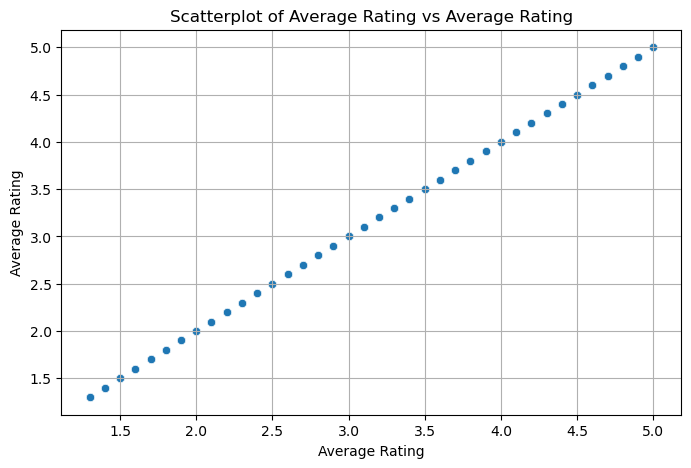

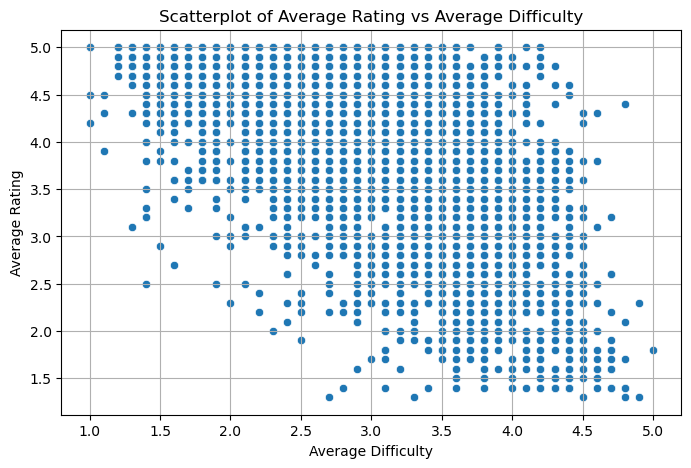

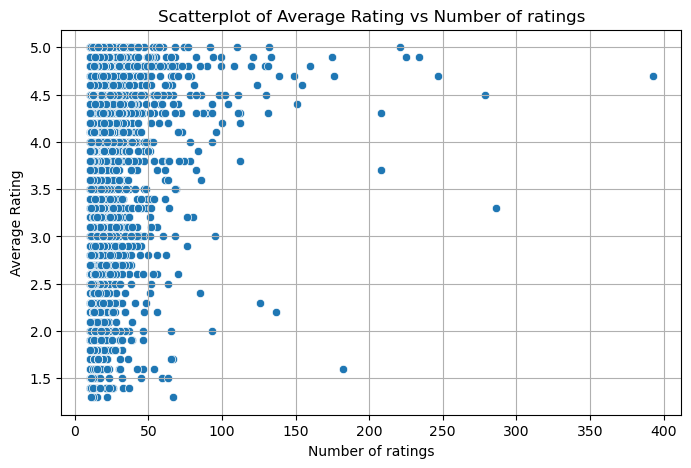

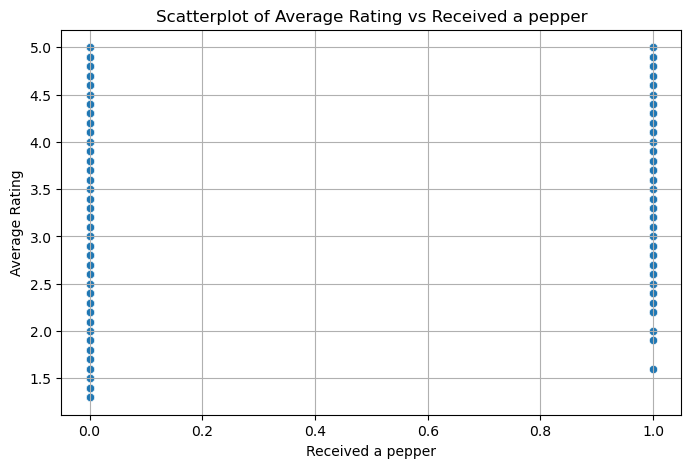

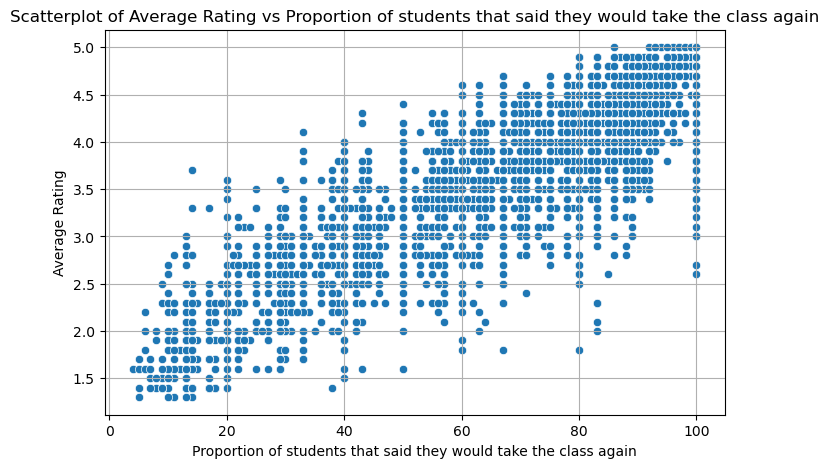

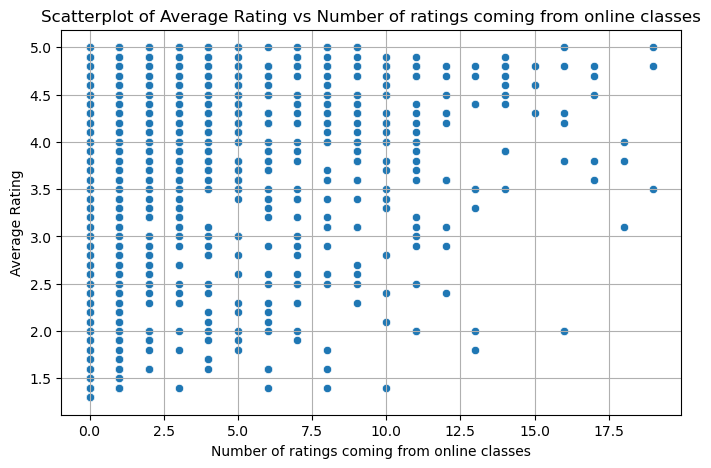

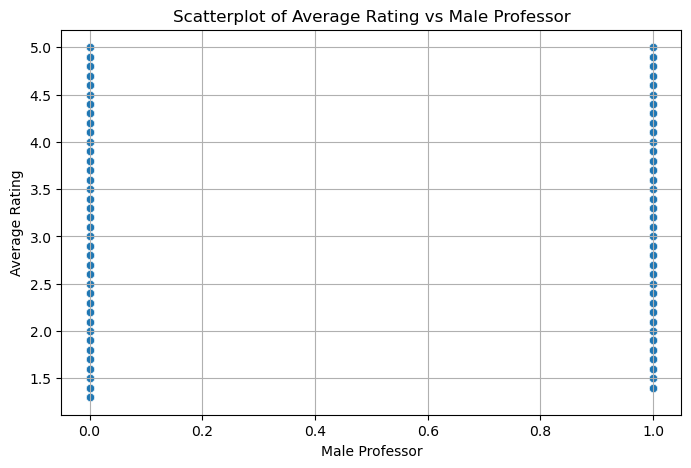

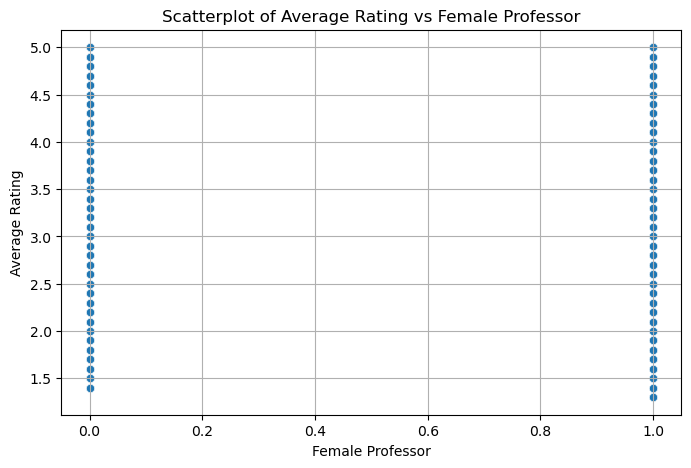

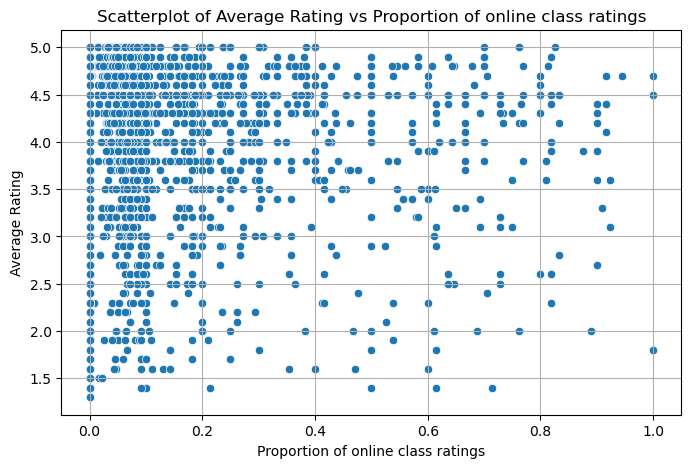

In [372]:
dependent_var='Average Rating'
for var in df_capstone_dropped_final.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df_capstone_dropped_final[var], y=df_capstone_dropped_final[dependent_var])
    plt.title(f'Scatterplot of {dependent_var} vs {var}')
    plt.xlabel(var)
    plt.ylabel(dependent_var)
    plt.grid(True)
    plt.show()

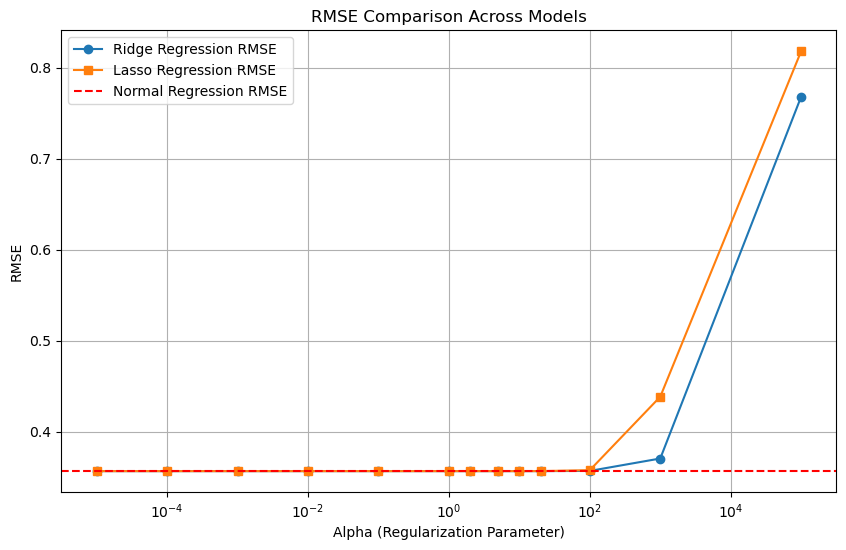

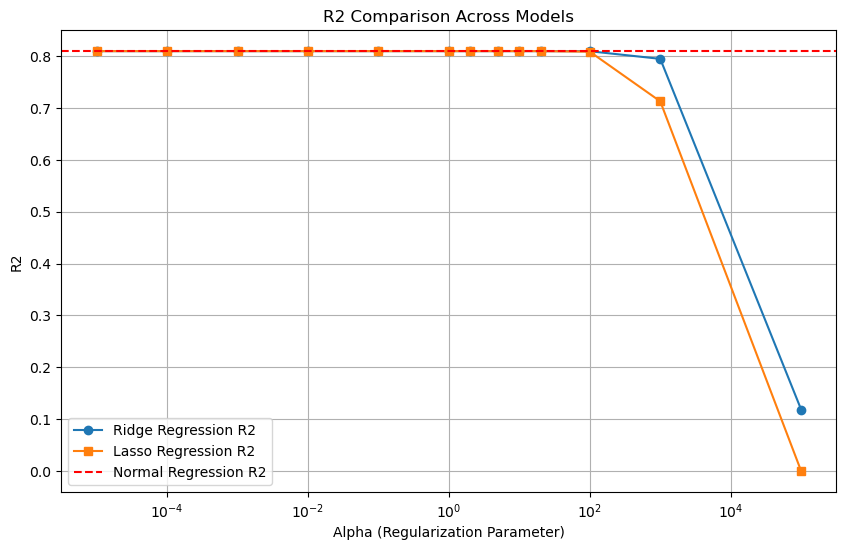

In [277]:
X = np.array([
    df_capstone_dropped_final['Average Difficulty'],
    df_capstone_dropped_final['Number of ratings'],
    df_capstone_dropped_final['Received a pepper'],
    df_capstone_dropped_final['Female Professor'],
    df_capstone_dropped_final['Proportion of online class ratings'],
    df_capstone_dropped_final['Proportion of students that said they would take the class again']

]).T

y = np.array(df_capstone_dropped_final['Average Rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

results=getKFresults(X,y)

results_df = pd.DataFrame(results, columns=['Model', 'Alpha', 'RMSE', 'R2'])

plot_results(results_df)

[0 6 3 2 5 4 1]
(array([ 3.98364780e+00, -1.67667484e-01,  2.87026829e-03,  9.77437181e-02,
       -9.09046688e-03,  1.20767073e-03,  5.77001543e-01]), 0.35187267376230197, 0.8234531053483295)


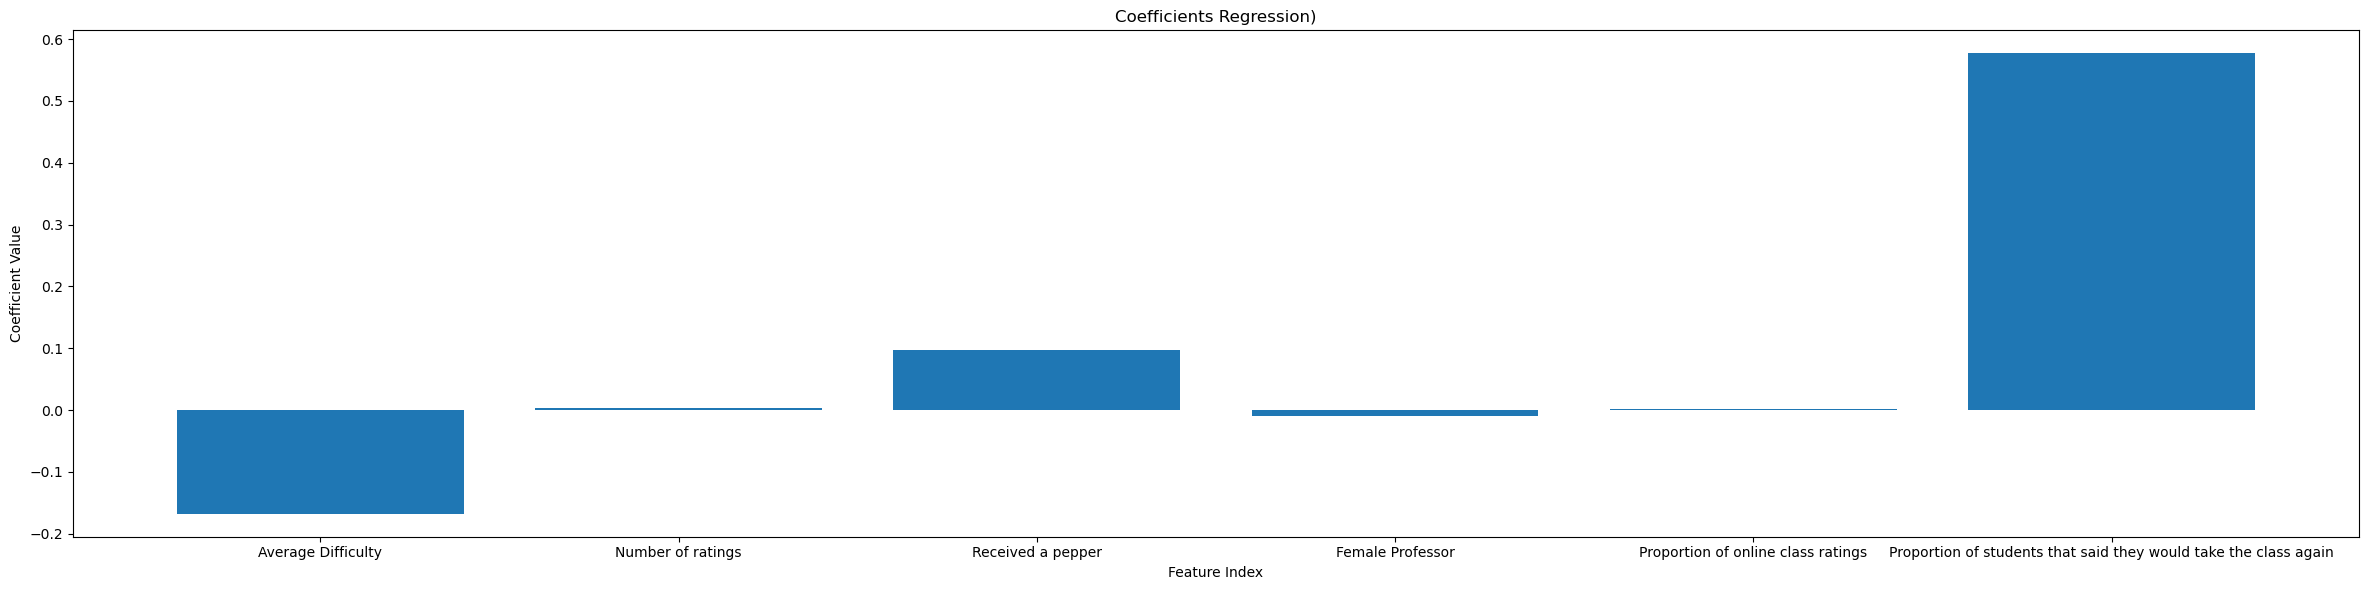

In [278]:
mybetas=getbetas(X_train,y_train,X_test,y_test)[0]
indices = np.argsort(mybetas)[::-1]
print(indices)  
print(getbetas(X_train,y_train,X_test,y_test))
plot_betas(getbetas(X_train,y_train,X_test,y_test)[0][1:],[i.name for i in [
    df_capstone_dropped_final['Average Difficulty'],
    df_capstone_dropped_final['Number of ratings'],
    df_capstone_dropped_final['Received a pepper'],
    df_capstone_dropped_final['Female Professor'],
    df_capstone_dropped_final['Proportion of online class ratings'],
    df_capstone_dropped_final['Proportion of students that said they would take the class again']
]])

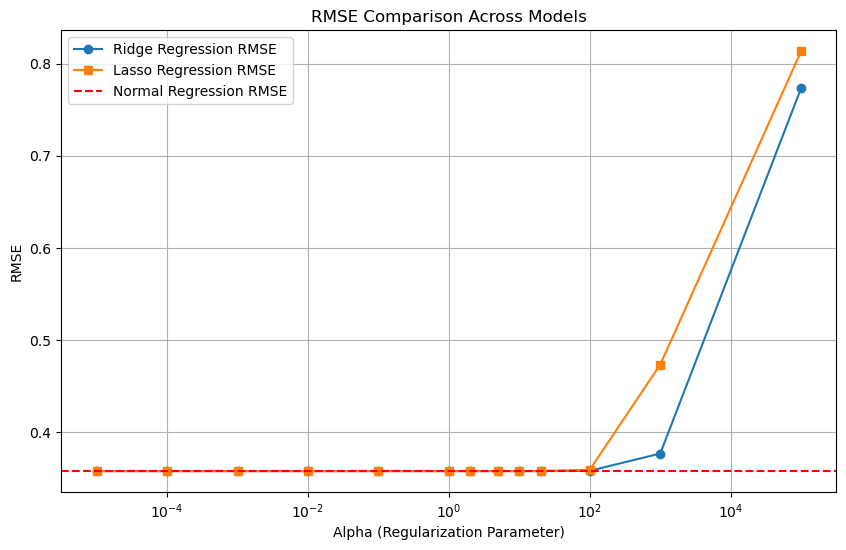

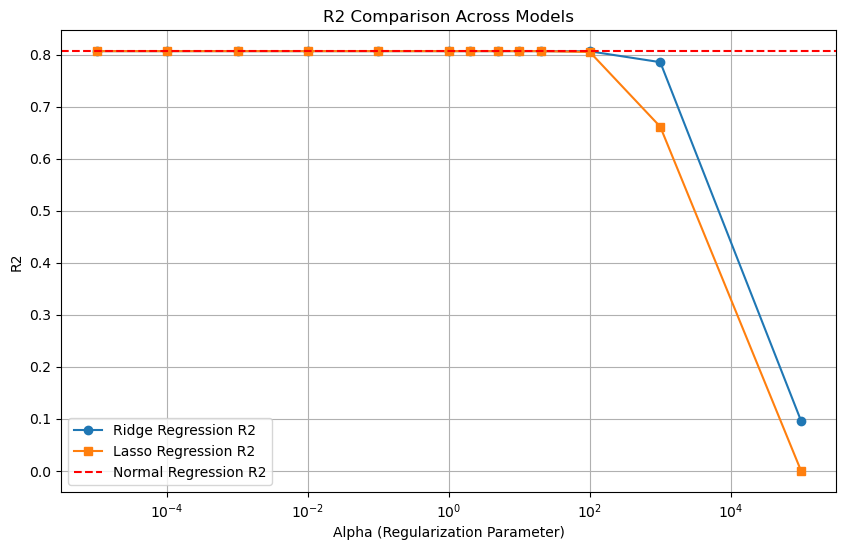

In [366]:
X = np.array([
    df_capstone_dropped_final['Proportion of students that said they would take the class again'],
    df_capstone_dropped_final['Average Difficulty'],
    df_capstone_dropped_final['Received a pepper']
]).T

y = np.array(df_capstone_dropped_final['Average Rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


results=getKFresults(X_train,y_train)

results_df = pd.DataFrame(results, columns=['Model', 'Alpha', 'RMSE', 'R2'])

plot_results(results_df)

[0 1 3 2]
(array([ 3.9836478 ,  0.57795615, -0.16720519,  0.09731689]), 0.3521637524232393, 0.8231608957354464)


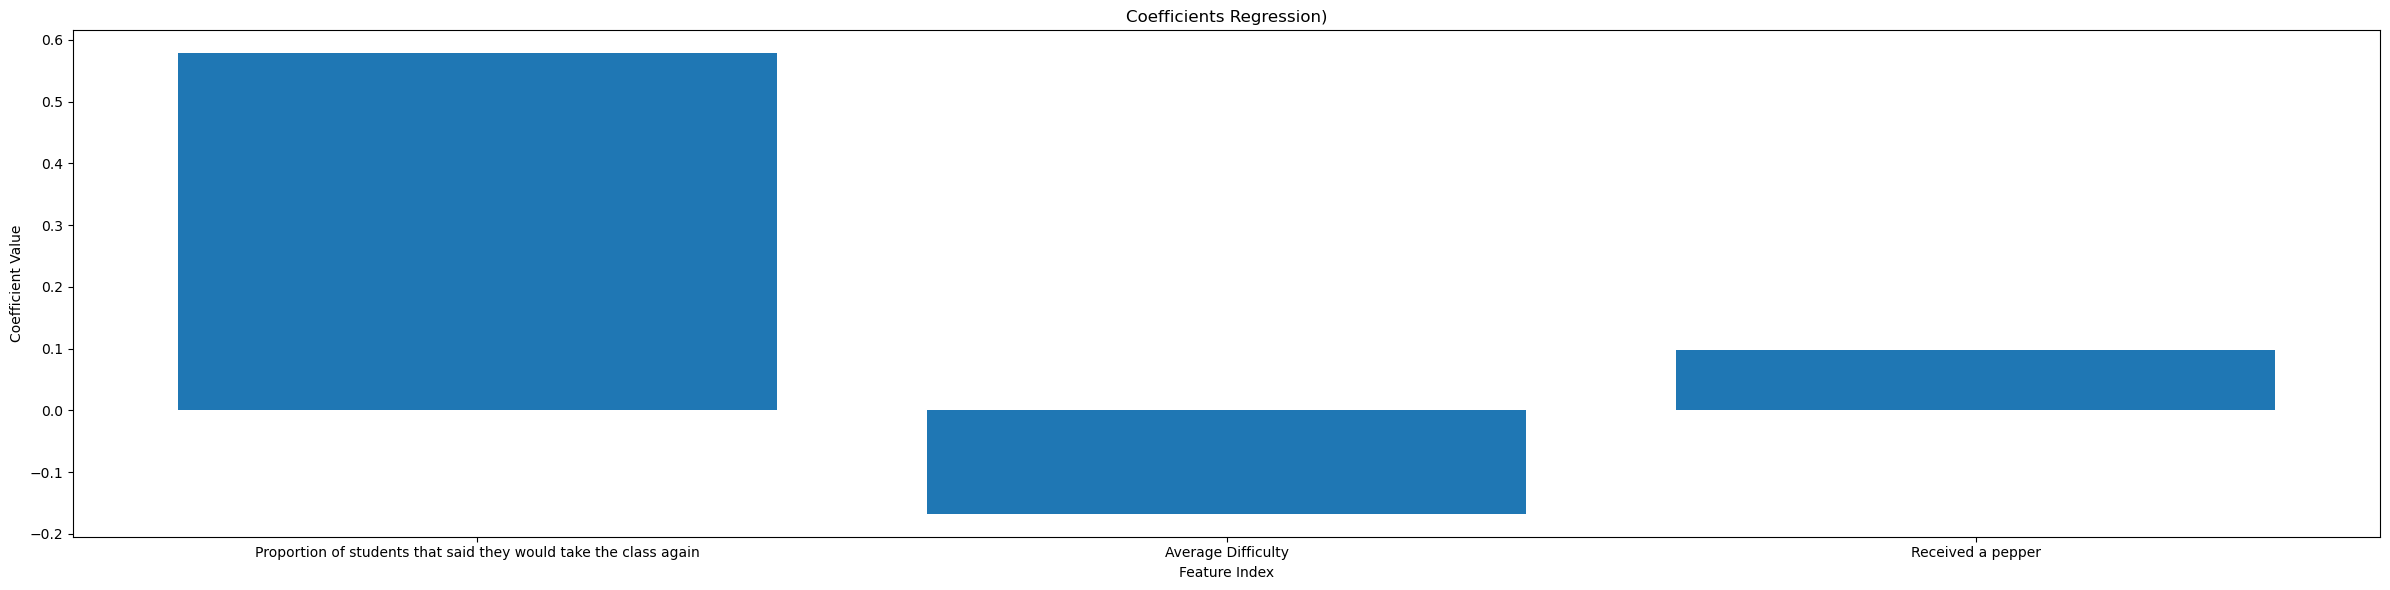

In [367]:
mybetas=getbetas(X_train,y_train,X_test,y_test)[0] 
indices = np.argsort(mybetas)[::-1] 
print(indices)  
print(getbetas(X_train,y_train,X_test,y_test))
plot_betas(getbetas(X_train,y_train,X_test,y_test)[0][1:],[i.name for i in [
    df_capstone_dropped_final['Proportion of students that said they would take the class again'],
    df_capstone_dropped_final['Average Difficulty'],
    df_capstone_dropped_final['Received a pepper']
]])

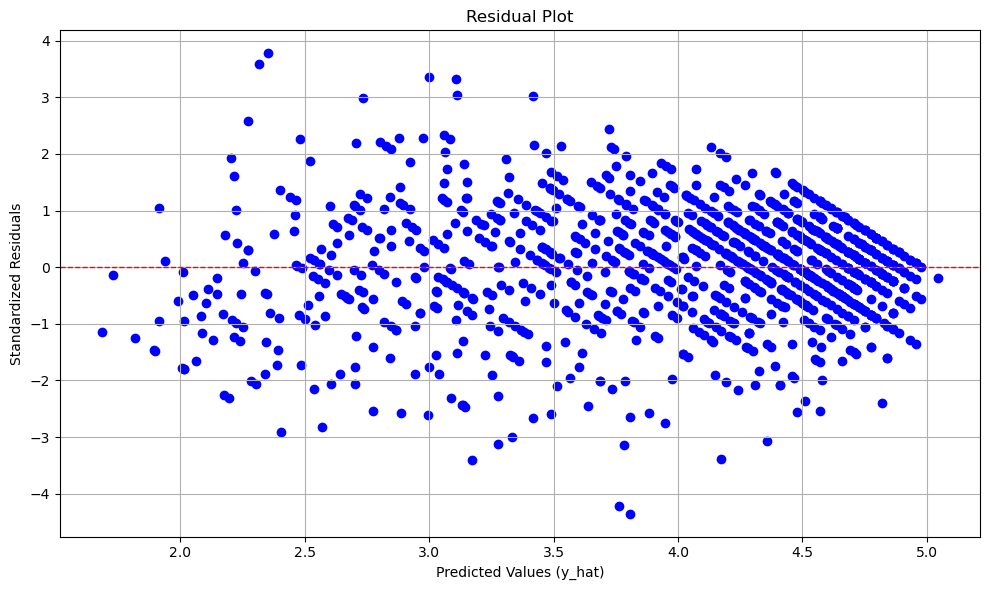

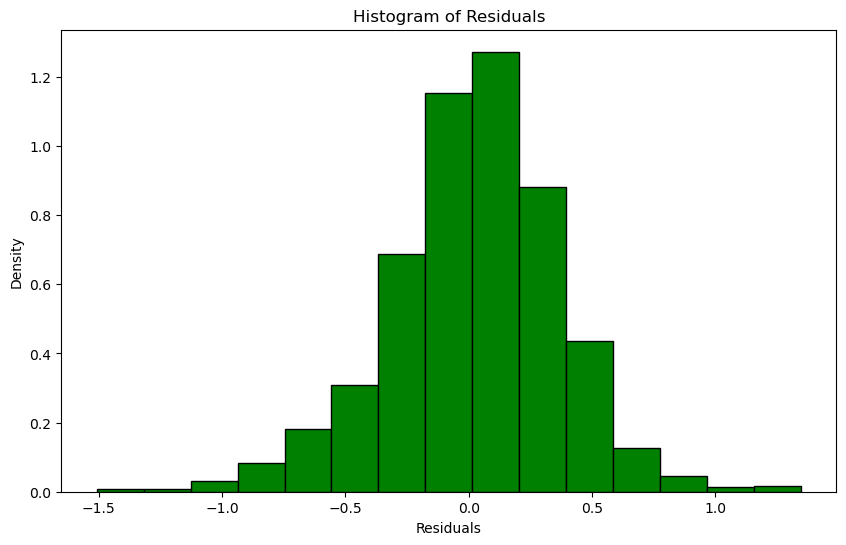

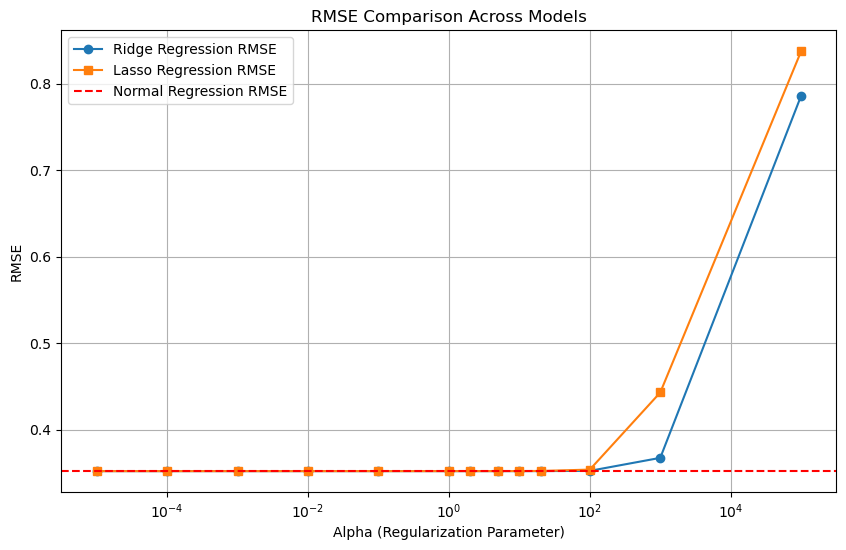

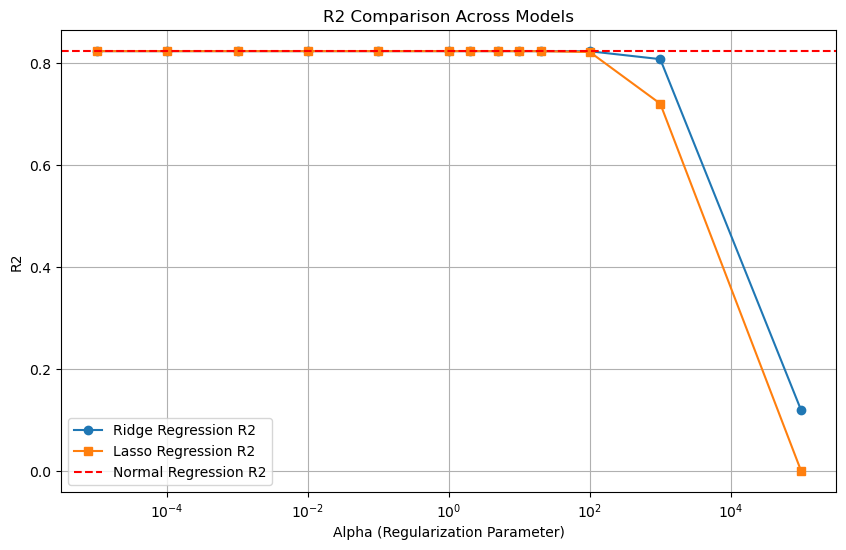

In [368]:
results=getfinalresults(X_train,y_train,X_test,y_test)
results_df = pd.DataFrame(results, columns=['Model', 'Alpha', 'RMSE', 'R2'])
plot_results(results_df)

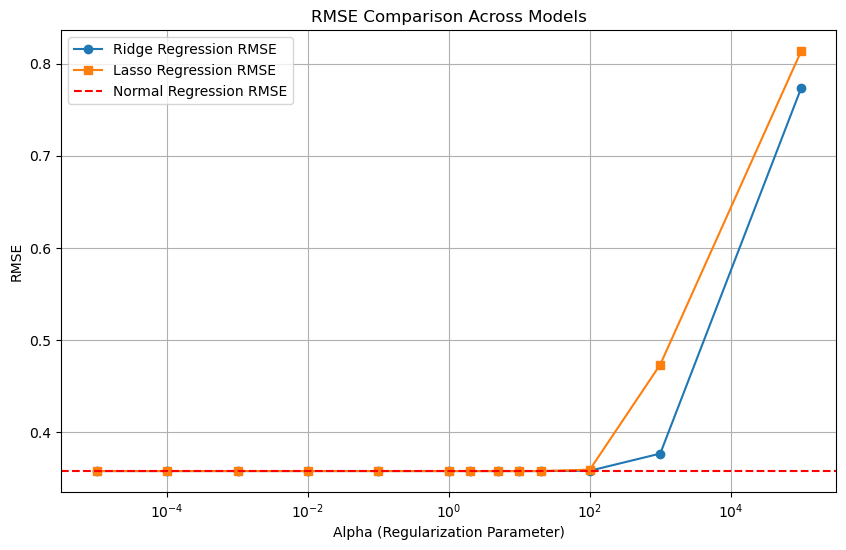

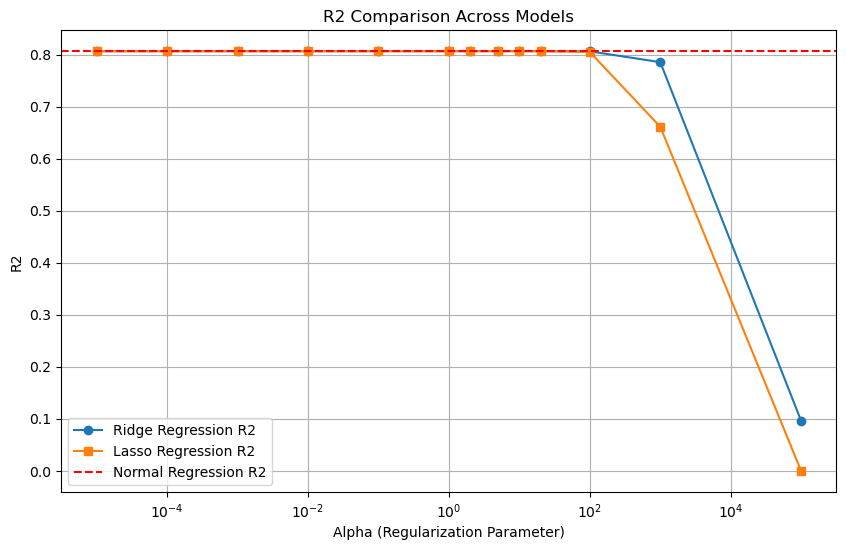

In [281]:
X = np.array([
    df_capstone_dropped_final['Average Difficulty'],
    df_capstone_dropped_final['Number of ratings'],
    df_capstone_dropped_final['Received a pepper'],
    df_capstone_dropped_final['Proportion of online class ratings'],
    df_capstone_dropped_final['Male Professor'],
    df_capstone_dropped_final['Number of ratings coming from online classes'],
    df_capstone_dropped_final['Proportion of students that said they would take the class again']
]).T

y = np.array(df_capstone_dropped_final['Average Rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


results=getKFresults(X_train,y_train)

results_df = pd.DataFrame(results, columns=['Model', 'Alpha', 'RMSE', 'R2'])

plot_results(results_df)

[0 7 3 5 6 2 4 1]
(array([ 3.98364780e+00, -1.67666513e-01,  2.08313311e-03,  9.76867587e-02,
       -3.77652183e-03,  9.14773490e-03,  5.54739996e-03,  5.76938029e-01]), 0.3519473165947453, 0.823378195535886)


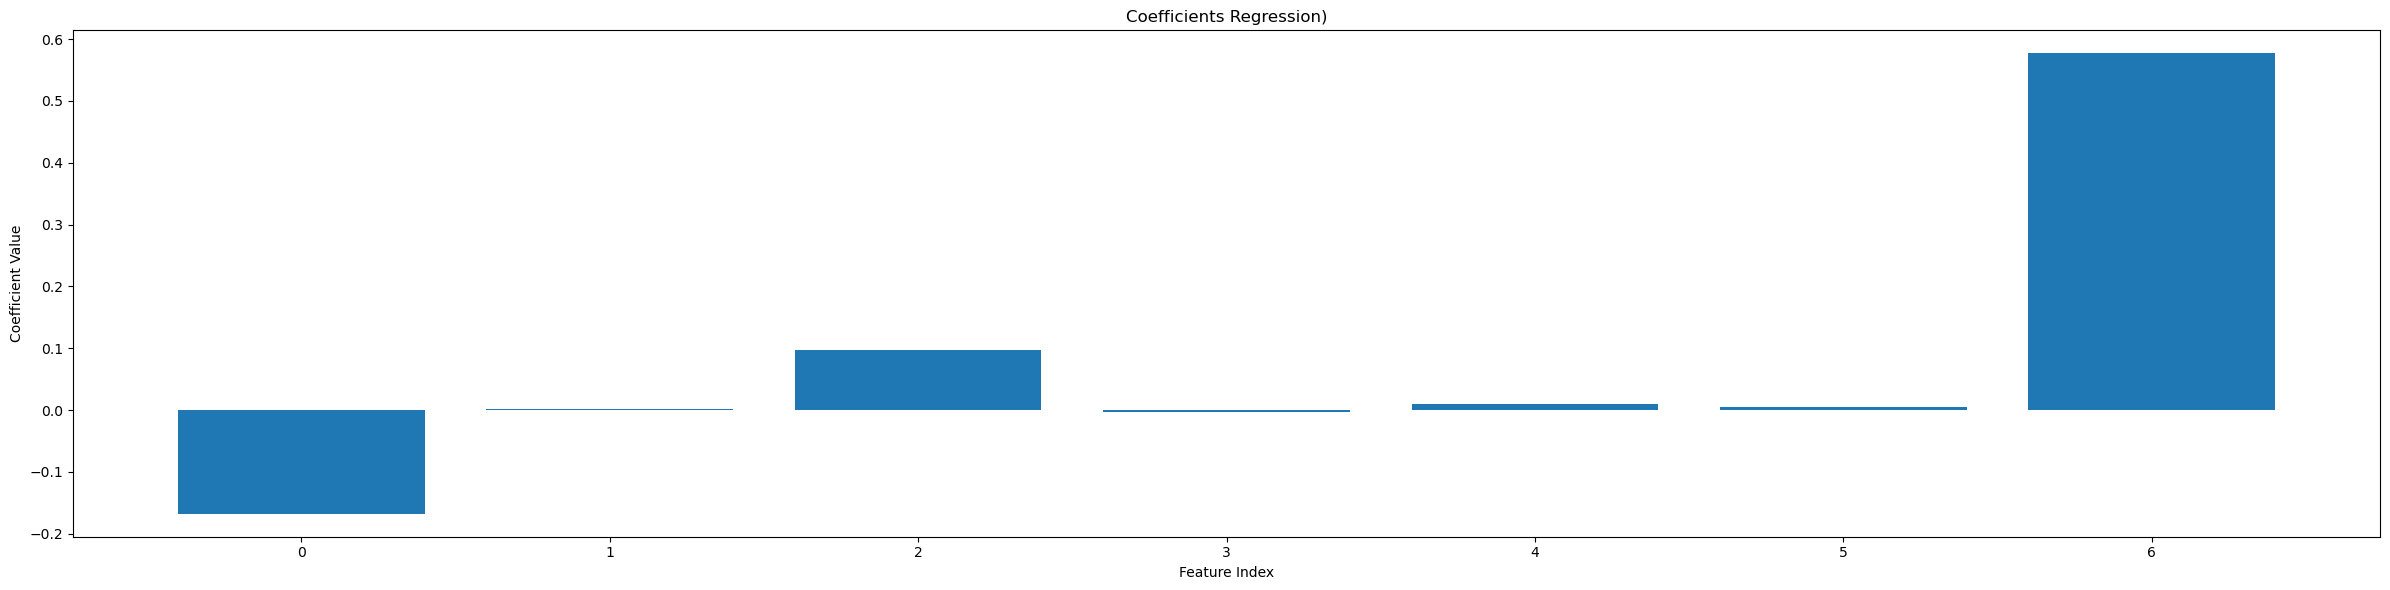

In [282]:
mybetas=getbetas(X_train,y_train,X_test,y_test)[0] 
indices = np.argsort(mybetas)[::-1] 
print(indices)  
print(getbetas(X_train,y_train,X_test,y_test))
plot_betas(getbetas(X_train,y_train,X_test,y_test)[0][1:])

In [283]:
tagsdf=pd.read_csv('./rmpCapstoneTags.csv', header=None)

In [284]:
Q8df=df_capstone[['Average Rating','Number of ratings']].join(tagsdf, how='inner')


In [285]:
Q8df.dropna(inplace=True)

In [286]:
Q8df

Average Rating  Number of ratings  0   1  2  3  4  5  6  7  ...  10  \
3                 3.6               10.0  6   3  0  0  2  4  2  1  ...   0   
5                 3.5               22.0  8  13  1  3  2  3  2  1  ...   0   
21                2.6               10.0  4   3  0  0  2  0  1  1  ...   0   
25                4.3               16.0  6   5  4  1  1  0  0  7  ...   0   
39                3.5               20.0  0   1  2  2  2  2  1  2  ...   1   
...               ...                ... ..  .. .. .. .. .. .. ..  ...  ..   
89841             4.2               11.0  2   2  3  4  1  0  1  0  ...   0   
89855             4.0               11.0  0   2  1  1  7  0  0  0  ...   0   
89866             4.4               14.0  4   1  1  0  1  5  3  0  ...   0   
89875             2.8               16.0  2   0  0  0  1  0  0  0  ...   0   
89877             3.6               10.0  3   0  1  0  0  1  6  1  ...   0   

       11  12  13  14  15  16  17  18  19  
3       2   1   0   0   0   0   0   1   0  
5       7   3   0   0   0   3   0   1   3  
21      0   0   0   0   1   1   0   5   1  
25      0   1   0   0   2  10   0   0   1  
39      0   0   0   0   0   5   6   0   4  
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  
89841   1   6   0   1   3   1   0   0   0  
89855   1   0   0   4   1   1   0   1   2  
89866   3   3   3   1   4   2   3   0   1  
89875   2   0   6   1   0   0   0   3   3  
89877   1   2   2   0   1   3   0   0   1  

[9841 rows x 22 columns]

In [287]:
for i in Q8df.columns[2:]:
    Q8df[i] = Q8df[i].div(Q8df['Number of ratings'])

In [288]:
Q8df

Average Rating  Number of ratings         0         1         2  \
3                 3.6               10.0  0.600000  0.300000  0.000000   
5                 3.5               22.0  0.363636  0.590909  0.045455   
21                2.6               10.0  0.400000  0.300000  0.000000   
25                4.3               16.0  0.375000  0.312500  0.250000   
39                3.5               20.0  0.000000  0.050000  0.100000   
...               ...                ...       ...       ...       ...   
89841             4.2               11.0  0.181818  0.181818  0.272727   
89855             4.0               11.0  0.000000  0.181818  0.090909   
89866             4.4               14.0  0.285714  0.071429  0.071429   
89875             2.8               16.0  0.125000  0.000000  0.000000   
89877             3.6               10.0  0.300000  0.000000  0.100000   

              3         4         5         6         7  ...    10        11  \
3      0.000000  0.200000  0.400000  0.200000  0.100000  ...  0.00  0.200000   
5      0.136364  0.090909  0.136364  0.090909  0.045455  ...  0.00  0.318182   
21     0.000000  0.200000  0.000000  0.100000  0.100000  ...  0.00  0.000000   
25     0.062500  0.062500  0.000000  0.000000  0.437500  ...  0.00  0.000000   
39     0.100000  0.100000  0.100000  0.050000  0.100000  ...  0.05  0.000000   
...         ...       ...       ...       ...       ...  ...   ...       ...   
89841  0.363636  0.090909  0.000000  0.090909  0.000000  ...  0.00  0.090909   
89855  0.090909  0.636364  0.000000  0.000000  0.000000  ...  0.00  0.090909   
89866  0.000000  0.071429  0.357143  0.214286  0.000000  ...  0.00  0.214286   
89875  0.000000  0.062500  0.000000  0.000000  0.000000  ...  0.00  0.125000   
89877  0.000000  0.000000  0.100000  0.600000  0.100000  ...  0.00  0.100000   

             12        13        14        15        16        17        18  \
3      0.100000  0.000000  0.000000  0.000000  0.000000  0.000000  0.100000   
5      0.136364  0.000000  0.000000  0.000000  0.136364  0.000000  0.045455   
21     0.000000  0.000000  0.000000  0.100000  0.100000  0.000000  0.500000   
25     0.062500  0.000000  0.000000  0.125000  0.625000  0.000000  0.000000   
39     0.000000  0.000000  0.000000  0.000000  0.250000  0.300000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
89841  0.545455  0.000000  0.090909  0.272727  0.090909  0.000000  0.000000   
89855  0.000000  0.000000  0.363636  0.090909  0.090909  0.000000  0.090909   
89866  0.214286  0.214286  0.071429  0.285714  0.142857  0.214286  0.000000   
89875  0.000000  0.375000  0.062500  0.000000  0.000000  0.000000  0.187500   
89877  0.200000  0.200000  0.000000  0.100000  0.300000  0.000000  0.000000   

             19  
3      0.000000  
5      0.136364  
21     0.100000  
25     0.062500  
39     0.200000  
...         ...  
89841  0.000000  
89855  0.181818  
89866  0.071429  
89875  0.187500  
89877  0.100000  

[9841 rows x 22 columns]

In [289]:
Q8dfgreater10=Q8df[Q8df['Number of ratings'] >= 10]

In [290]:
Q8dfgreater10

Average Rating  Number of ratings         0         1         2  \
3                 3.6               10.0  0.600000  0.300000  0.000000   
5                 3.5               22.0  0.363636  0.590909  0.045455   
21                2.6               10.0  0.400000  0.300000  0.000000   
25                4.3               16.0  0.375000  0.312500  0.250000   
39                3.5               20.0  0.000000  0.050000  0.100000   
...               ...                ...       ...       ...       ...   
89841             4.2               11.0  0.181818  0.181818  0.272727   
89855             4.0               11.0  0.000000  0.181818  0.090909   
89866             4.4               14.0  0.285714  0.071429  0.071429   
89875             2.8               16.0  0.125000  0.000000  0.000000   
89877             3.6               10.0  0.300000  0.000000  0.100000   

              3         4         5         6         7  ...    10        11  \
3      0.000000  0.200000  0.400000  0.200000  0.100000  ...  0.00  0.200000   
5      0.136364  0.090909  0.136364  0.090909  0.045455  ...  0.00  0.318182   
21     0.000000  0.200000  0.000000  0.100000  0.100000  ...  0.00  0.000000   
25     0.062500  0.062500  0.000000  0.000000  0.437500  ...  0.00  0.000000   
39     0.100000  0.100000  0.100000  0.050000  0.100000  ...  0.05  0.000000   
...         ...       ...       ...       ...       ...  ...   ...       ...   
89841  0.363636  0.090909  0.000000  0.090909  0.000000  ...  0.00  0.090909   
89855  0.090909  0.636364  0.000000  0.000000  0.000000  ...  0.00  0.090909   
89866  0.000000  0.071429  0.357143  0.214286  0.000000  ...  0.00  0.214286   
89875  0.000000  0.062500  0.000000  0.000000  0.000000  ...  0.00  0.125000   
89877  0.000000  0.000000  0.100000  0.600000  0.100000  ...  0.00  0.100000   

             12        13        14        15        16        17        18  \
3      0.100000  0.000000  0.000000  0.000000  0.000000  0.000000  0.100000   
5      0.136364  0.000000  0.000000  0.000000  0.136364  0.000000  0.045455   
21     0.000000  0.000000  0.000000  0.100000  0.100000  0.000000  0.500000   
25     0.062500  0.000000  0.000000  0.125000  0.625000  0.000000  0.000000   
39     0.000000  0.000000  0.000000  0.000000  0.250000  0.300000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
89841  0.545455  0.000000  0.090909  0.272727  0.090909  0.000000  0.000000   
89855  0.000000  0.000000  0.363636  0.090909  0.090909  0.000000  0.090909   
89866  0.214286  0.214286  0.071429  0.285714  0.142857  0.214286  0.000000   
89875  0.000000  0.375000  0.062500  0.000000  0.000000  0.000000  0.187500   
89877  0.200000  0.200000  0.000000  0.100000  0.300000  0.000000  0.000000   

             19  
3      0.000000  
5      0.136364  
21     0.100000  
25     0.062500  
39     0.200000  
...         ...  
89841  0.000000  
89855  0.181818  
89866  0.071429  
89875  0.187500  
89877  0.100000  

[9841 rows x 22 columns]

In [291]:
corrgreater40=Q8dfgreater10.corr()[Q8dfgreater10.corr()>0.42]
[i for i in list(corrgreater40[corrgreater40.notnull()].stack().index) if i[0]!=i[1]]

[('Average Rating', 1),
 ('Average Rating', 2),
 ('Average Rating', 7),
 ('Average Rating', 15),
 ('Average Rating', 16),
 (1, 'Average Rating'),
 (2, 'Average Rating'),
 (2, 7),
 (7, 'Average Rating'),
 (7, 2),
 (15, 'Average Rating'),
 (16, 'Average Rating')]

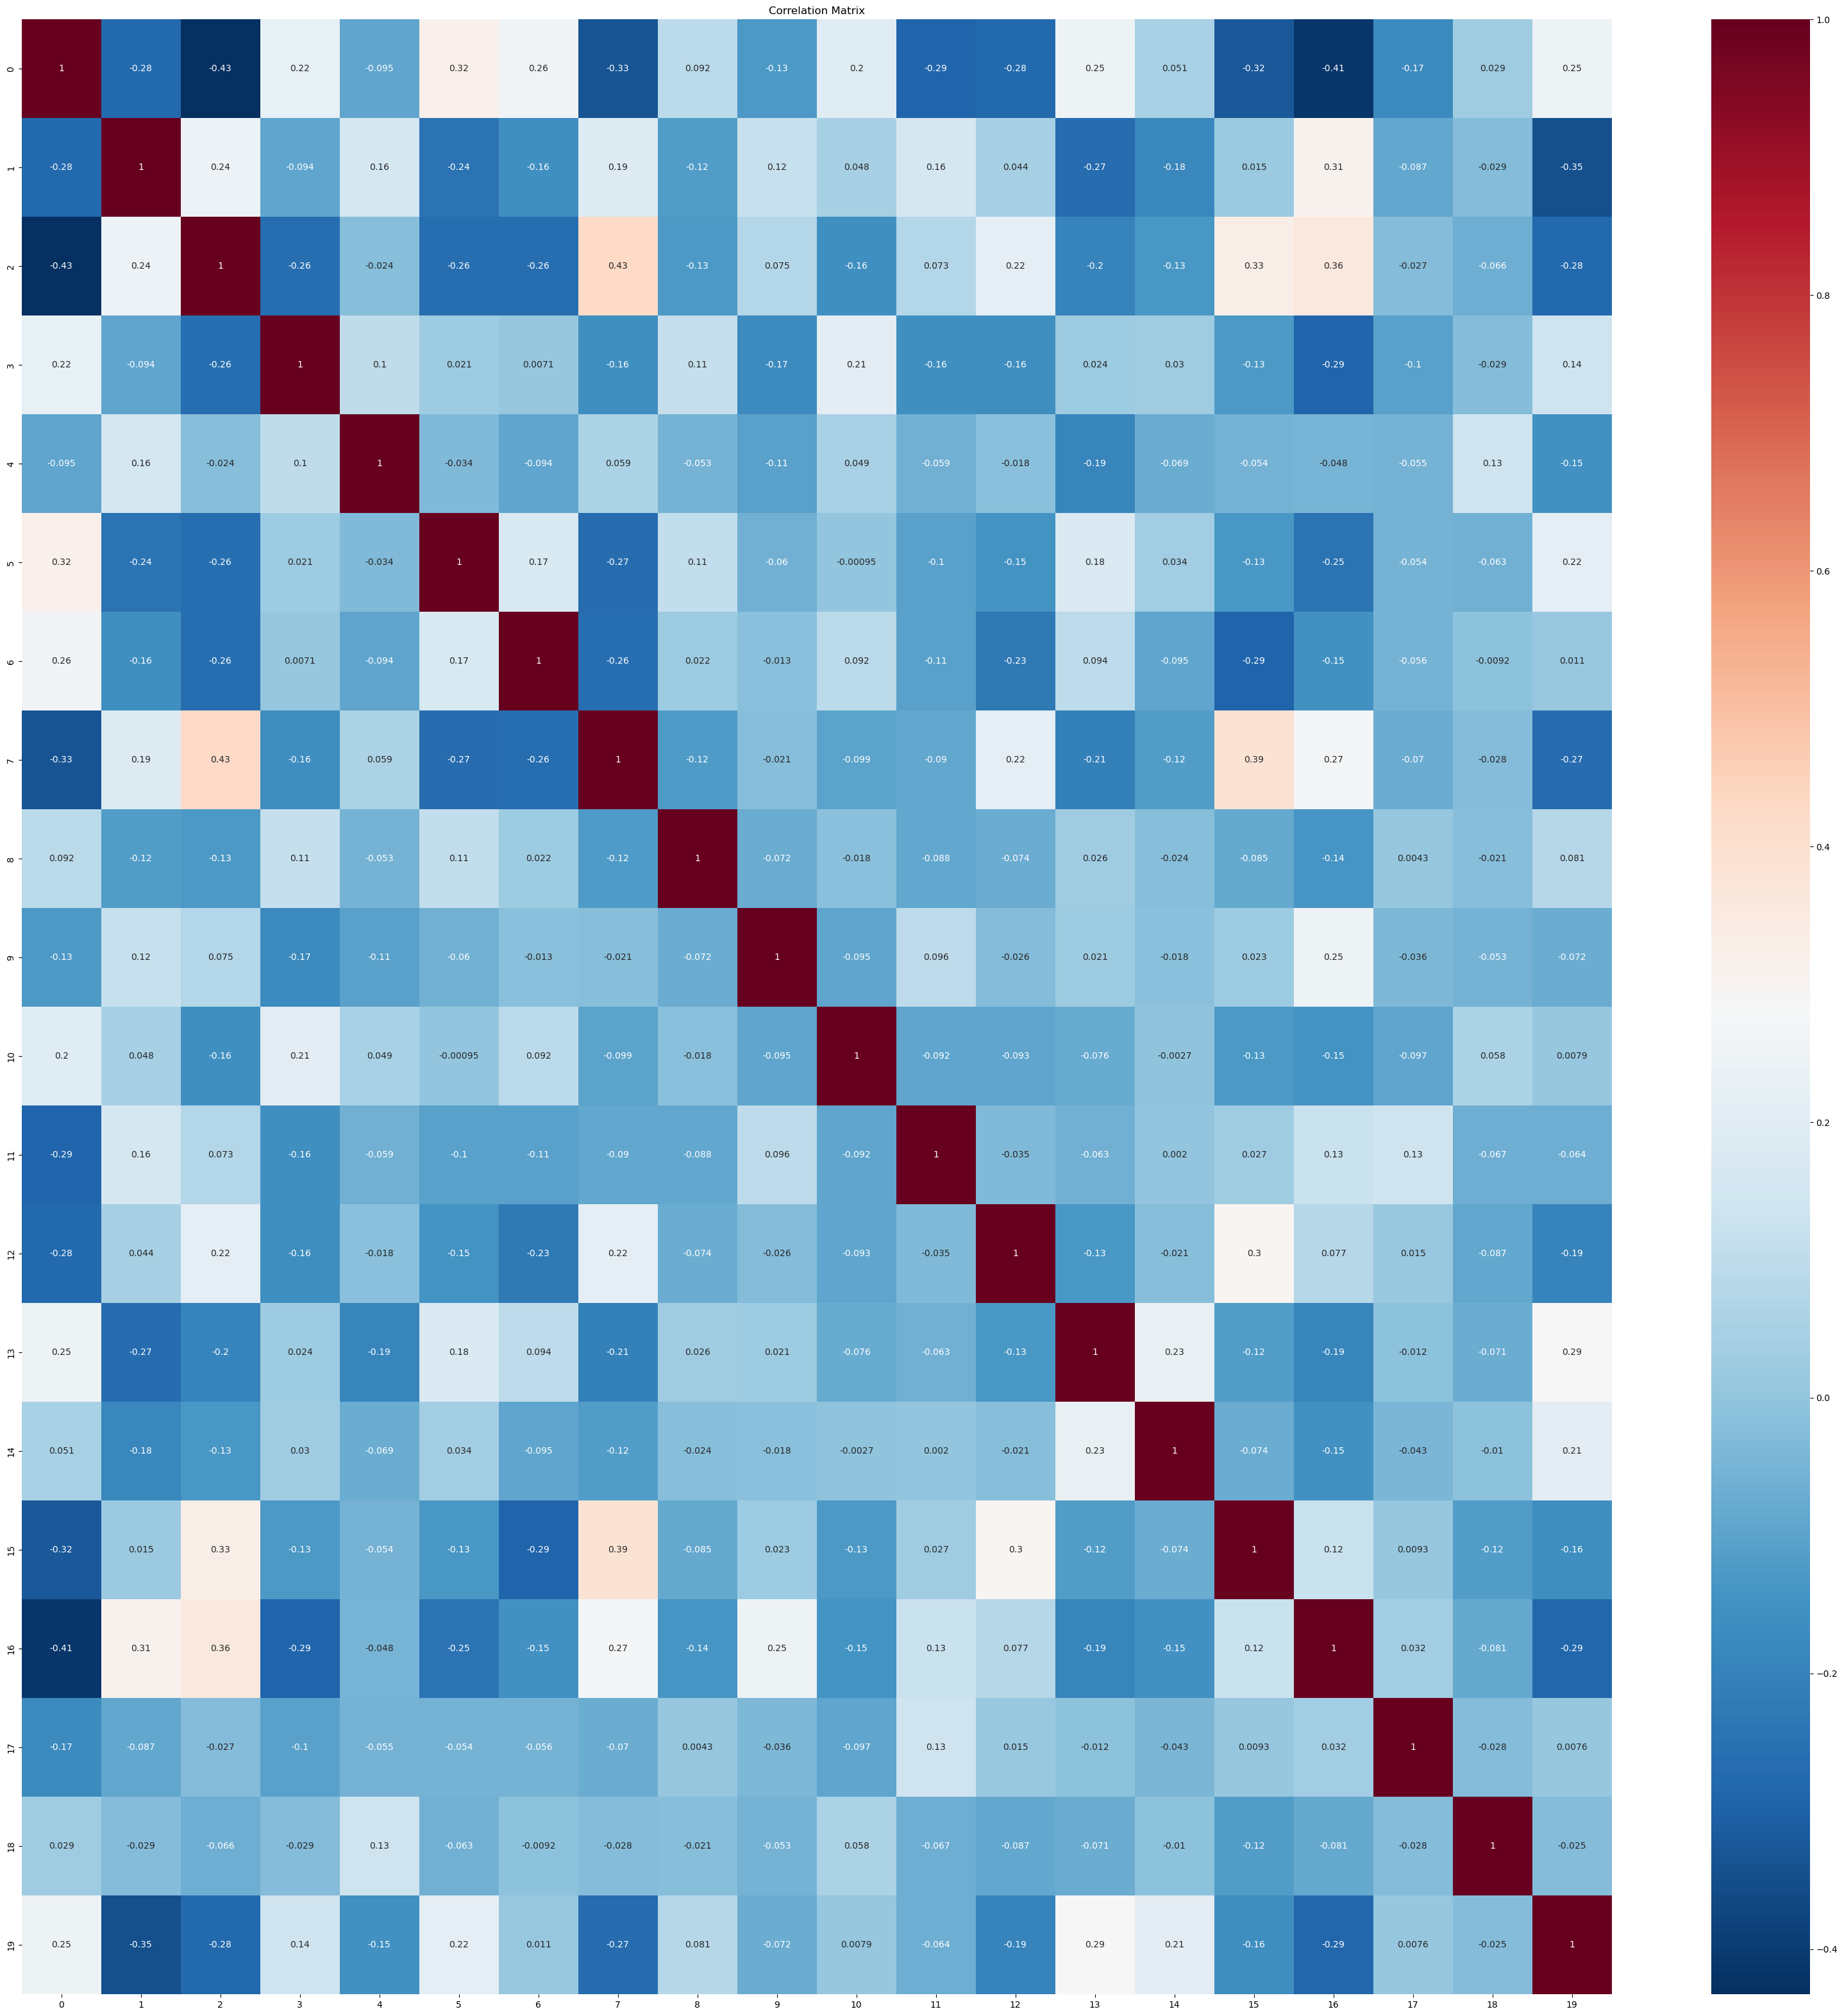

In [292]:
correlation_matrix = Q8dfgreater10.drop(columns=['Number of ratings','Average Rating']).corr()
plt.figure(figsize = (40,40))
sns.heatmap(correlation_matrix,cmap = "RdBu_r", annot=True)
plt.title('Correlation Matrix')
plt.show()


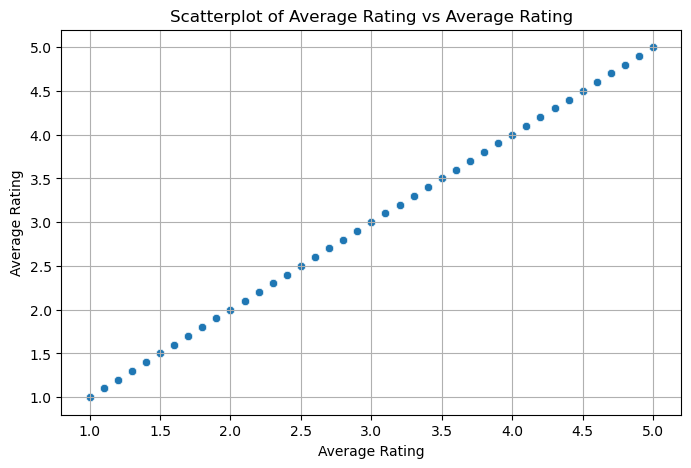

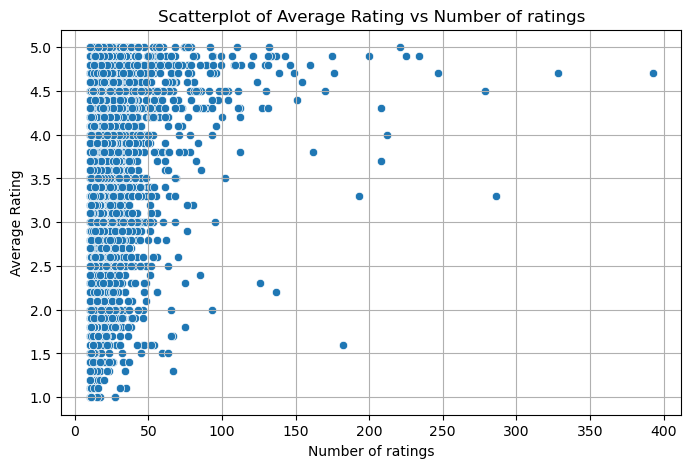

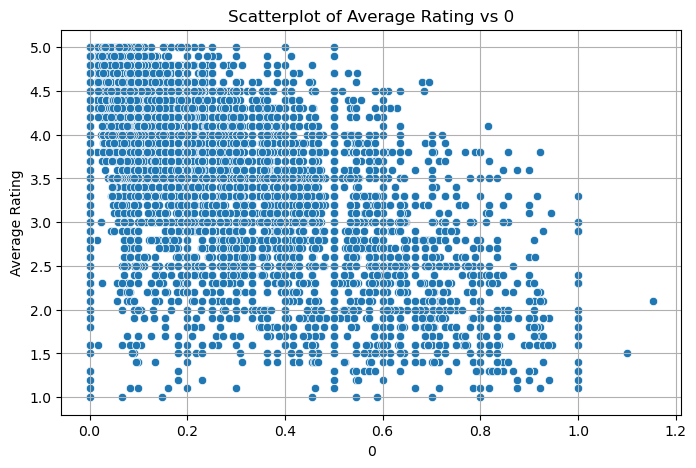

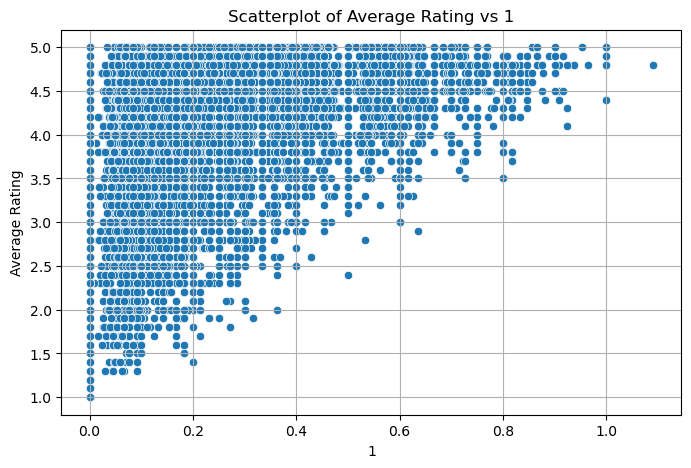

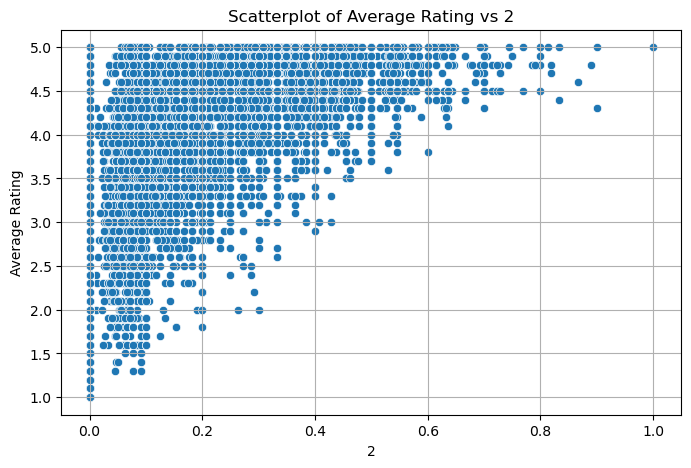

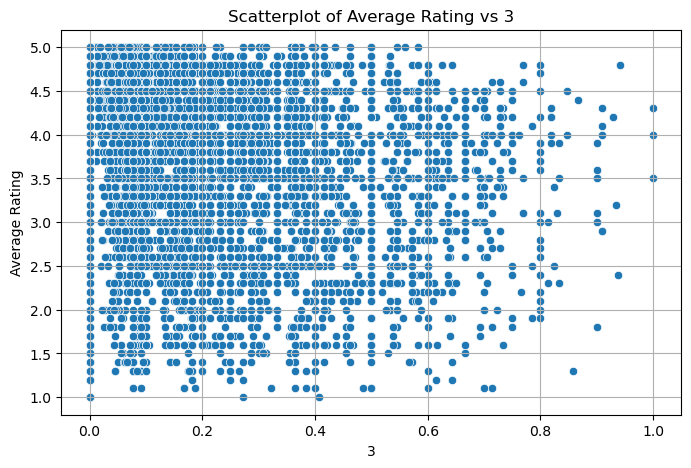

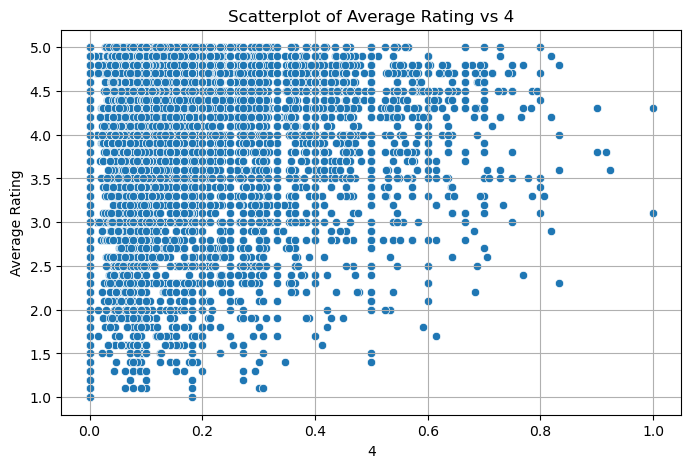

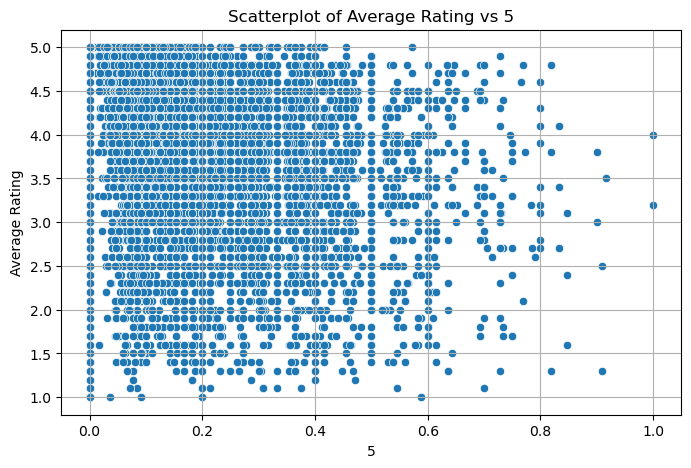

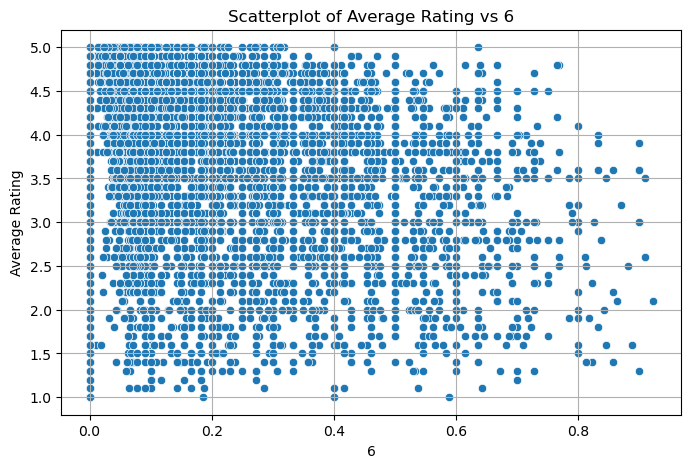

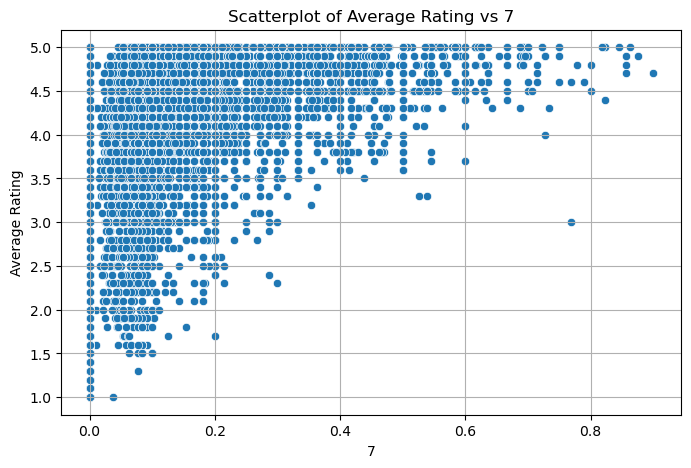

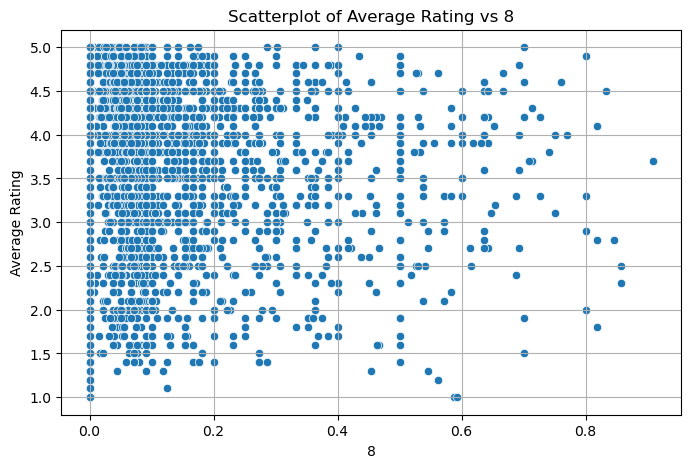

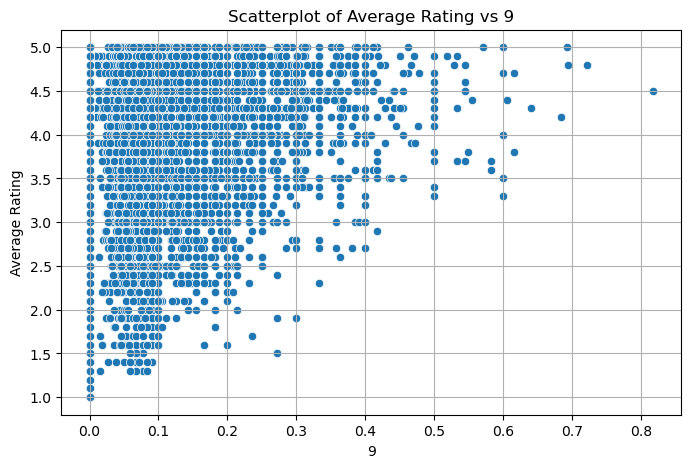

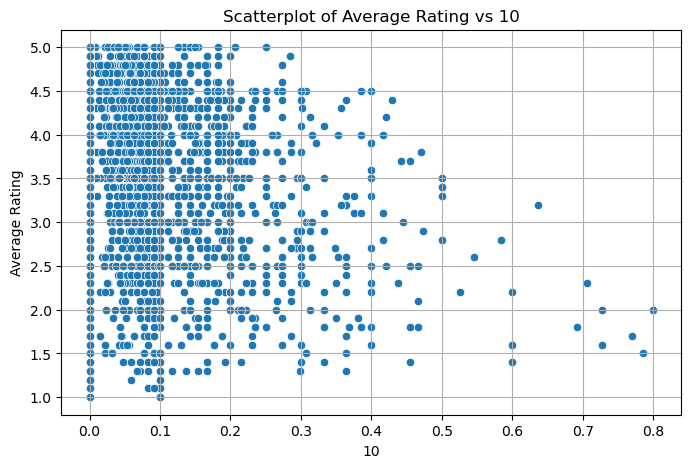

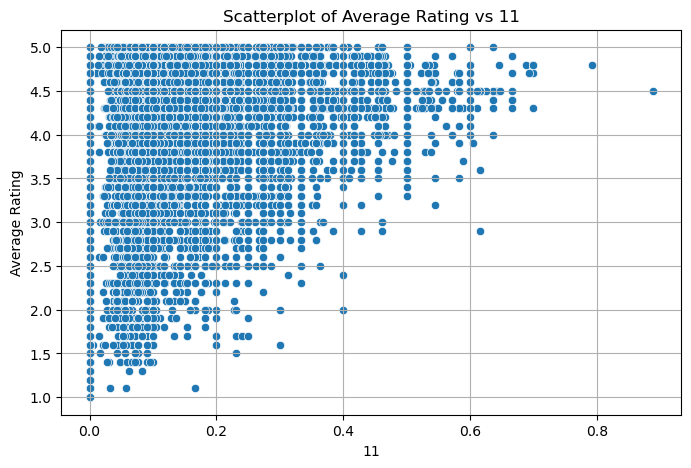

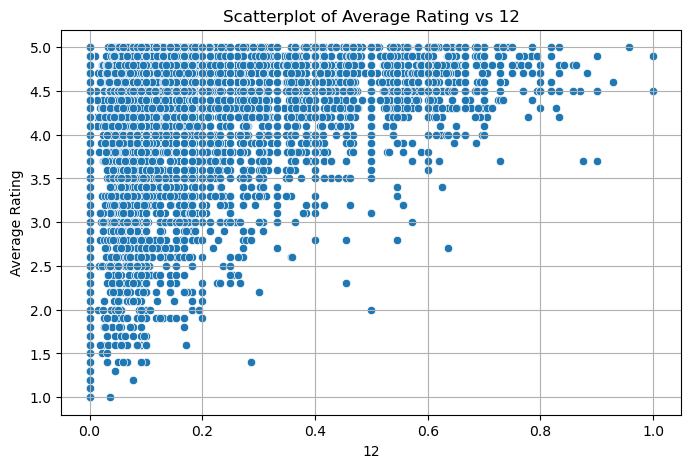

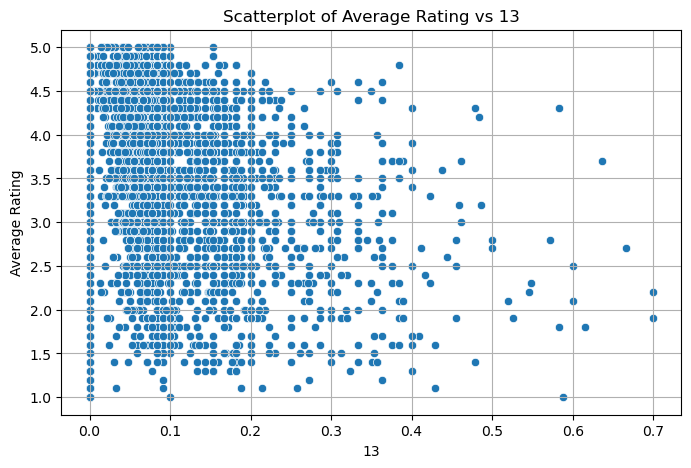

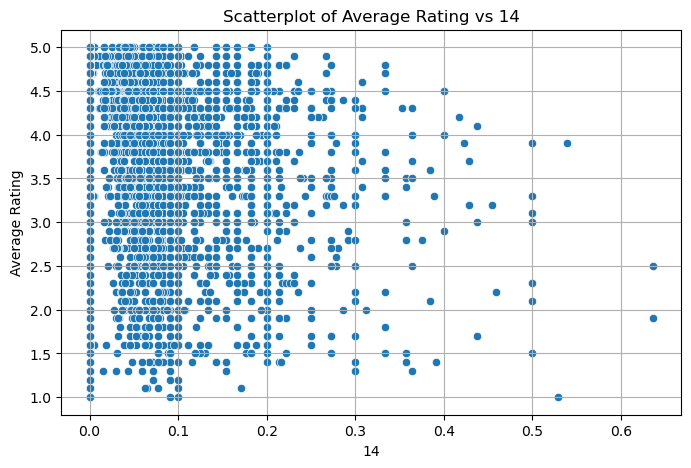

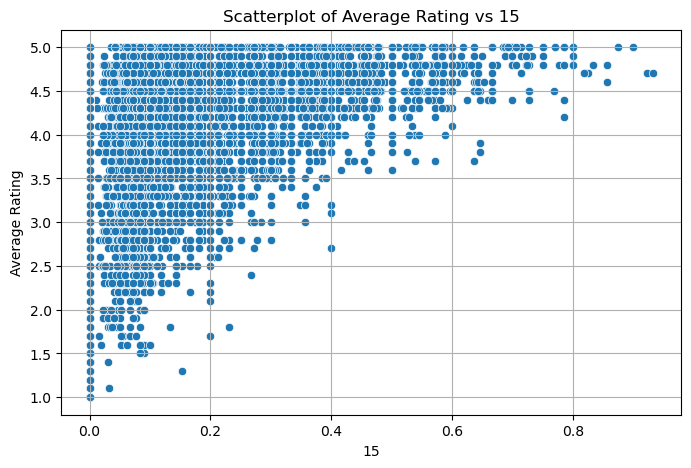

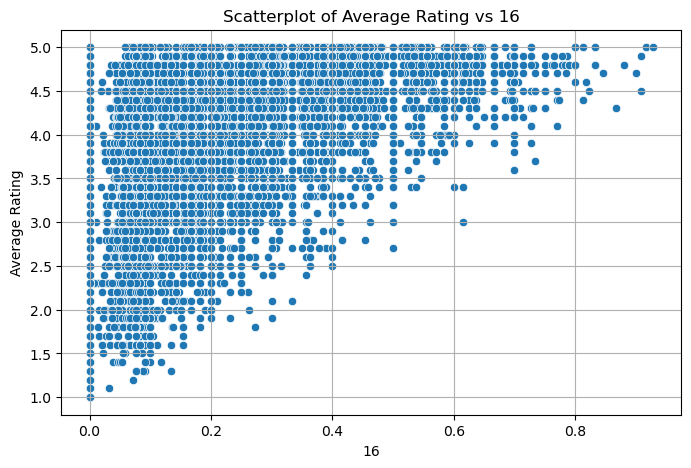

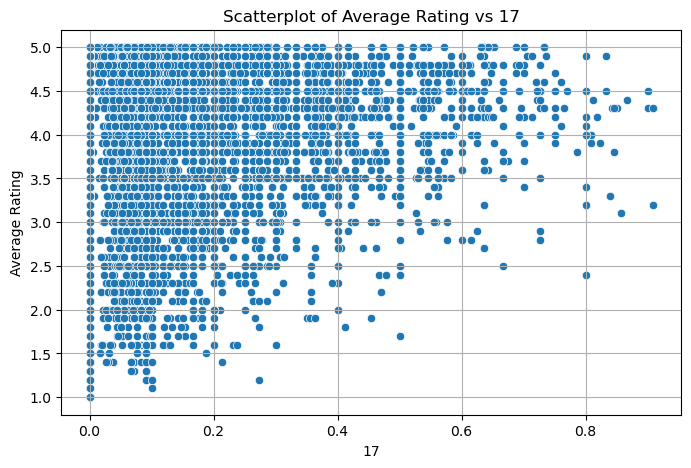

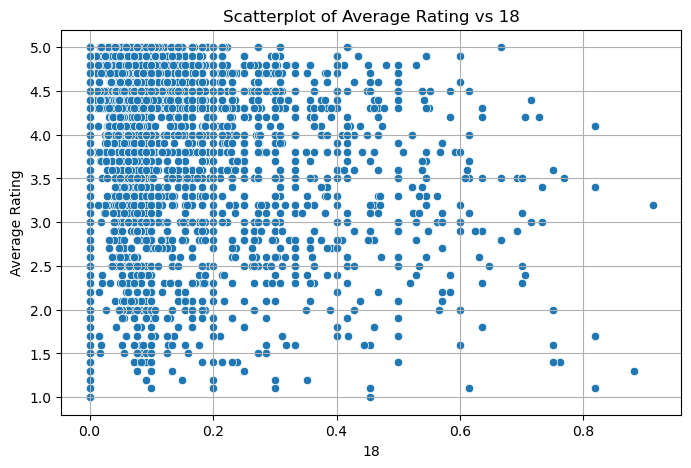

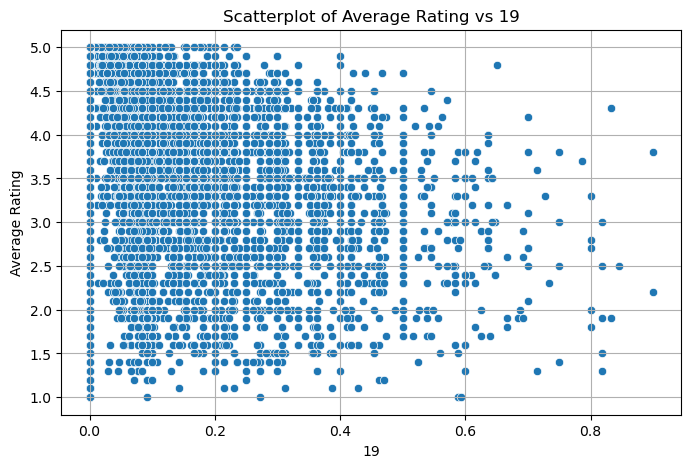

In [373]:
dependent_var='Average Rating'
for var in Q8dfgreater10.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=Q8dfgreater10[var], y=Q8dfgreater10[dependent_var])
    plt.title(f'Scatterplot of {dependent_var} vs {var}')
    plt.xlabel(var)
    plt.ylabel(dependent_var)
    plt.grid(True)
    plt.show()

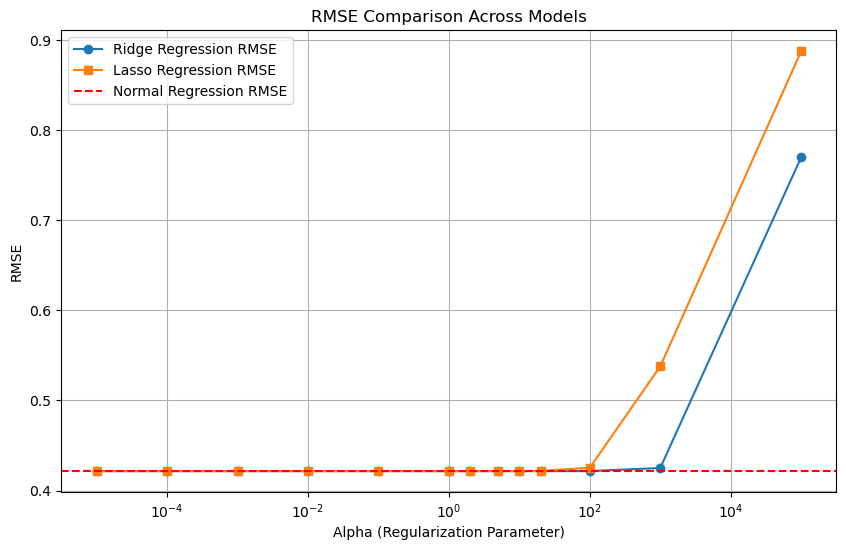

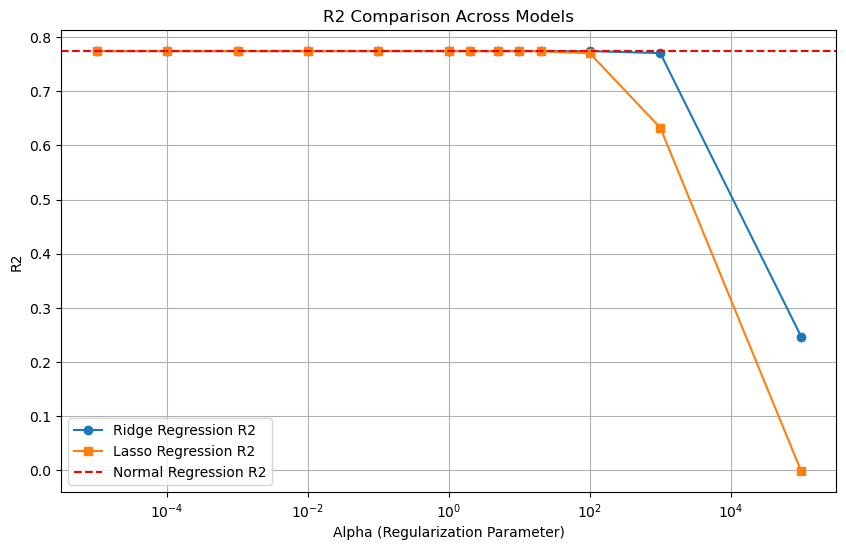

In [336]:
import numpy as np
from sklearn.model_selection import KFold  

X = np.array([
    Q8dfgreater10[0],
    Q8dfgreater10[1],
    Q8dfgreater10[2],
    Q8dfgreater10[3],
    Q8dfgreater10[4],
    Q8dfgreater10[5],
    Q8dfgreater10[6],
    Q8dfgreater10[7],
    Q8dfgreater10[8],
    Q8dfgreater10[9],
    Q8dfgreater10[10],
    Q8dfgreater10[11],
    Q8dfgreater10[12],
    Q8dfgreater10[13],
    Q8dfgreater10[14],
    Q8dfgreater10[15],
    Q8dfgreater10[16],
    Q8dfgreater10[17],
    Q8dfgreater10[18],
    Q8dfgreater10[19],
]).T

y = np.array(Q8dfgreater10['Average Rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


results=getKFresults(X_train,y_train)

results_df = pd.DataFrame(results, columns=['Model', 'Alpha', 'RMSE', 'R2'])

plot_results(results_df)

[ 0  1 14 10  7  4  6 20 16  9 11  8  5 19  2  3 15 17 18 13 12]
(array([ 2.96004827e+00,  3.72116041e-01, -1.18840562e-02, -1.87854031e-02,
        7.58716091e-02, -9.19694073e-03,  6.96475242e-02,  8.28987520e-02,
       -2.25299775e-03,  1.00370672e-02,  1.00106892e-01,  3.33143328e-03,
       -8.51338110e-02, -7.76797352e-02,  1.10683394e-01, -3.70629585e-02,
        1.97991597e-02, -4.83579383e-02, -5.93378107e-02, -9.86003198e-03,
        2.93567971e-02]), 0.471742842847206, 0.5992359725333618)


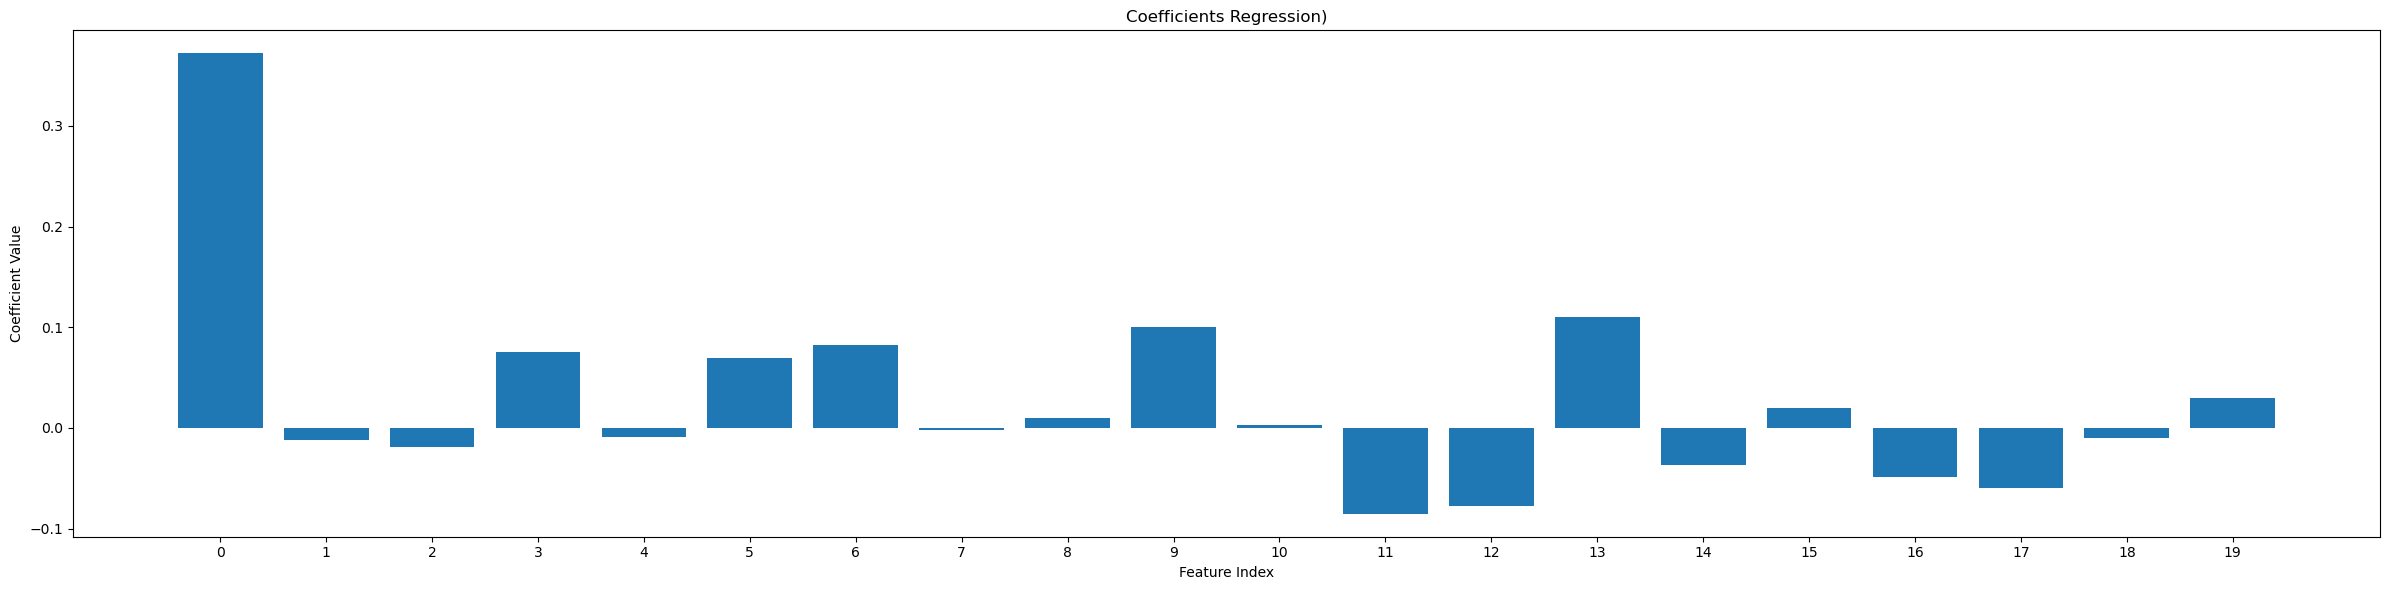

In [364]:
mybetas=getbetas(X_train,y_train,X_test,y_test)[0] 
indices = np.argsort(mybetas)[::-1] 
print(indices)  
print(getbetas(X_train,y_train,X_test,y_test))
plot_betas(getbetas(X_train,y_train,X_test,y_test)[0][1:],[i.name for i in [
    Q8dfgreater10[0],
    Q8dfgreater10[1],
    Q8dfgreater10[2],
    Q8dfgreater10[3],
    Q8dfgreater10[4],
    Q8dfgreater10[5],
    Q8dfgreater10[6],
    Q8dfgreater10[7],
    Q8dfgreater10[8],
    Q8dfgreater10[9],
    Q8dfgreater10[10],
    Q8dfgreater10[11],
    Q8dfgreater10[12],
    Q8dfgreater10[13],
    Q8dfgreater10[14],
    Q8dfgreater10[15],
    Q8dfgreater10[16],
    Q8dfgreater10[17],
    Q8dfgreater10[18],
    Q8dfgreater10[19],
]])

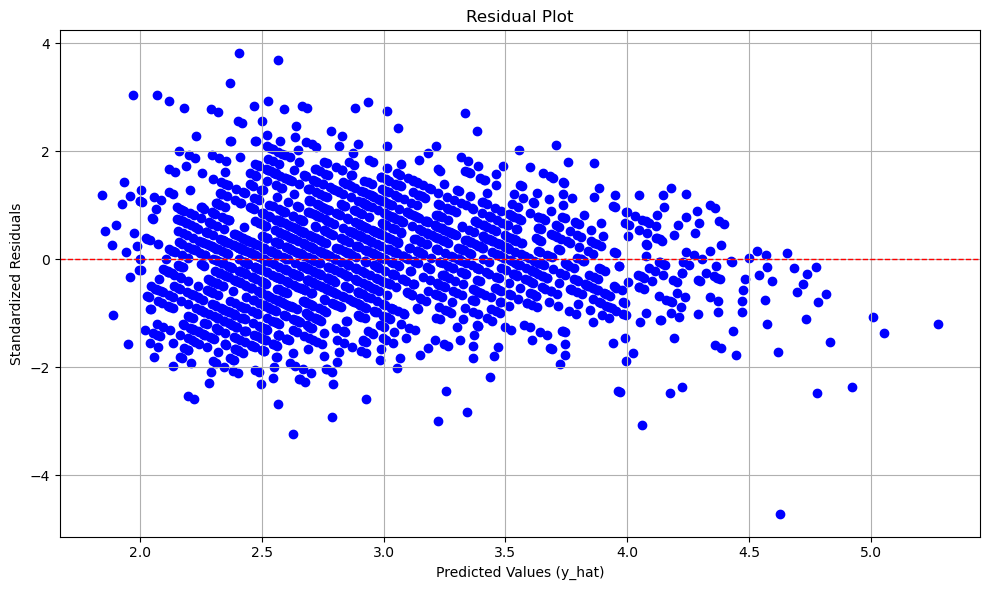

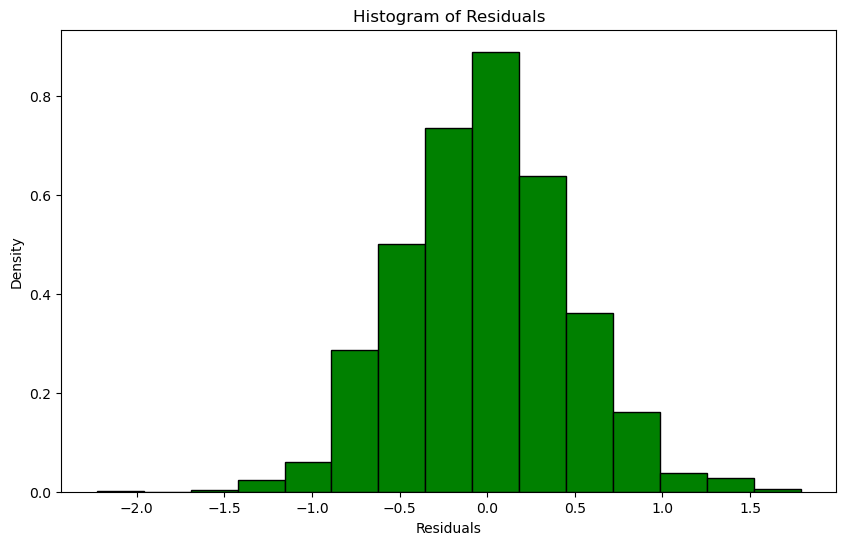

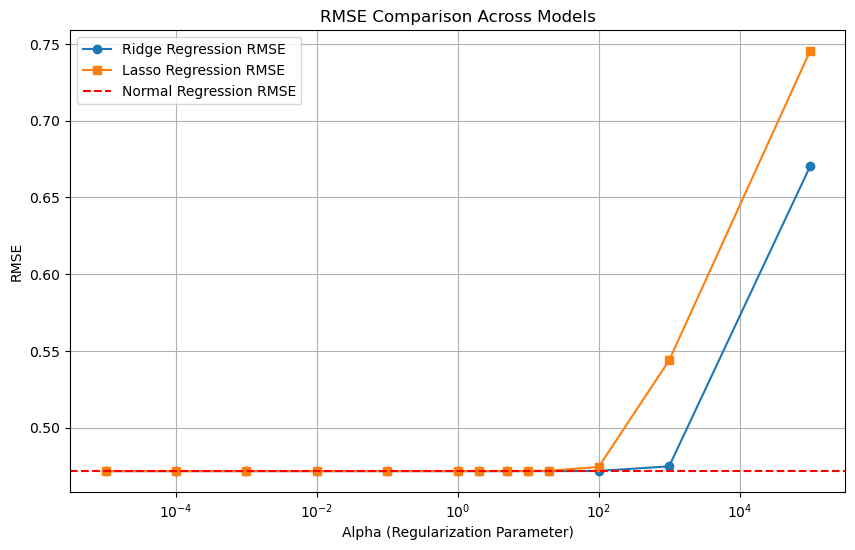

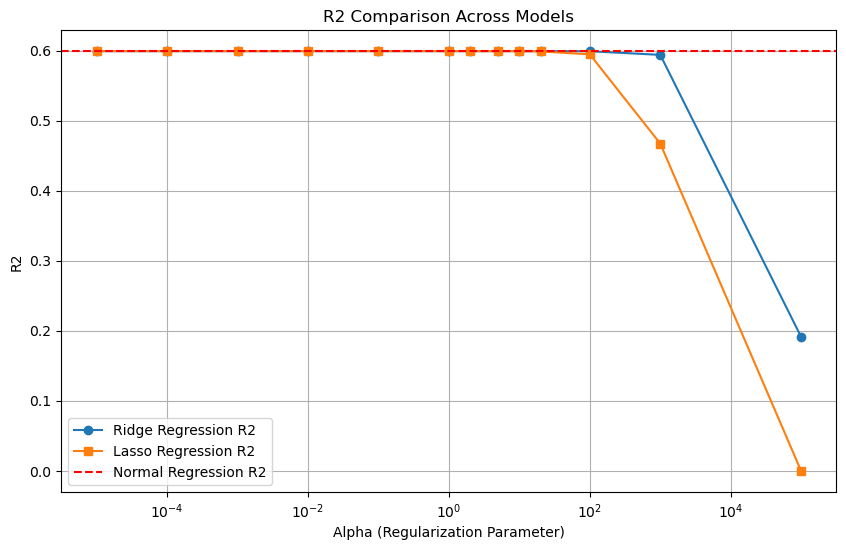

In [365]:
results=getfinalresults(X_train,y_train,X_test,y_test)
results_df = pd.DataFrame(results, columns=['Model', 'Alpha', 'RMSE', 'R2'])
plot_results(results_df)

In [355]:
Q8dfgreater10.corr()


Average Rating  Number of ratings         0         1  \
Average Rating           1.000000           0.067959 -0.686853  0.474293   
Number of ratings        0.067959           1.000000 -0.050264 -0.006367   
0                       -0.686853          -0.050264  1.000000 -0.279184   
1                        0.474293          -0.006367 -0.279184  1.000000   
2                        0.569435           0.072052 -0.432823  0.241074   
3                       -0.270620          -0.048046  0.222176 -0.093648   
4                        0.115545          -0.015655 -0.094804  0.159847   
5                       -0.282645          -0.016248  0.318143 -0.244874   
6                       -0.347608          -0.015150  0.260375 -0.156233   
7                        0.440587           0.067040 -0.333427  0.191812   
8                       -0.135112          -0.025200  0.091535 -0.116659   
9                        0.180992           0.040420 -0.128916  0.120023   
10                      -0.200319          -0.044974  0.196800  0.048142   
11                       0.302407          -0.002330 -0.291843  0.157828   
12                       0.367402           0.069560 -0.279221  0.043984   
13                      -0.334875           0.018782  0.246531 -0.267705   
14                      -0.191333          -0.036706  0.051359 -0.182395   
15                       0.463747           0.081023 -0.321189  0.015235   
16                       0.515424           0.013673 -0.410780  0.309357   
17                       0.141480           0.035563 -0.172267 -0.086934   
18                      -0.098968          -0.025148  0.028694 -0.028624   
19                      -0.412927          -0.041681  0.246206 -0.346267   

                          2         3         4         5         6         7  \
Average Rating     0.569435 -0.270620  0.115545 -0.282645 -0.347608  0.440587   
Number of ratings  0.072052 -0.048046 -0.015655 -0.016248 -0.015150  0.067040   
0                 -0.432823  0.222176 -0.094804  0.318143  0.260375 -0.333427   
1                  0.241074 -0.093648  0.159847 -0.244874 -0.156233  0.191812   
2                  1.000000 -0.264006 -0.023937 -0.263143 -0.264172  0.426323   
3                 -0.264006  1.000000  0.099859  0.021023  0.007098 -0.160425   
4                 -0.023937  0.099859  1.000000 -0.034340 -0.093931  0.058516   
5                 -0.263143  0.021023 -0.034340  1.000000  0.168757 -0.269544   
6                 -0.264172  0.007098 -0.093931  0.168757  1.000000 -0.261014   
7                  0.426323 -0.160425  0.058516 -0.269544 -0.261014  1.000000   
8                 -0.130207  0.111660 -0.053049  0.108581  0.022489 -0.120089   
9                  0.075294 -0.174342 -0.106775 -0.059616 -0.013180 -0.020846   
10                -0.155054  0.209634  0.049101 -0.000954  0.091560 -0.098652   
11                 0.073372 -0.156828 -0.059450 -0.104150 -0.106454 -0.089812   
12                 0.215042 -0.162631 -0.017662 -0.147249 -0.230603  0.215599   
13                -0.195254  0.024215 -0.189373  0.176475  0.093755 -0.205101   
14                -0.132421  0.030474 -0.069110  0.033567 -0.094752 -0.119008   
15                 0.330634 -0.129362 -0.054041 -0.134582 -0.290231  0.387460   
16                 0.357273 -0.287732 -0.048333 -0.246984 -0.148499  0.268645   
17                -0.026556 -0.104214 -0.055444 -0.053867 -0.056439 -0.070447   
18                -0.066091 -0.028973  0.134431 -0.062529 -0.009198 -0.027835   
19                -0.277722  0.135545 -0.152808  0.215648  0.010998 -0.266522   

                   ...        10        11        12        13        14  \
Average Rating     ... -0.200319  0.302407  0.367402 -0.334875 -0.191333   
Number of ratings  ... -0.044974 -0.002330  0.069560  0.018782 -0.036706   
0                  ...  0.196800 -0.291843 -0.279221  0.246531  0.051359   
1                  ...  0.048142  0.157828  0.043984 -0.267705 -0.182395   
2                  ... -0.

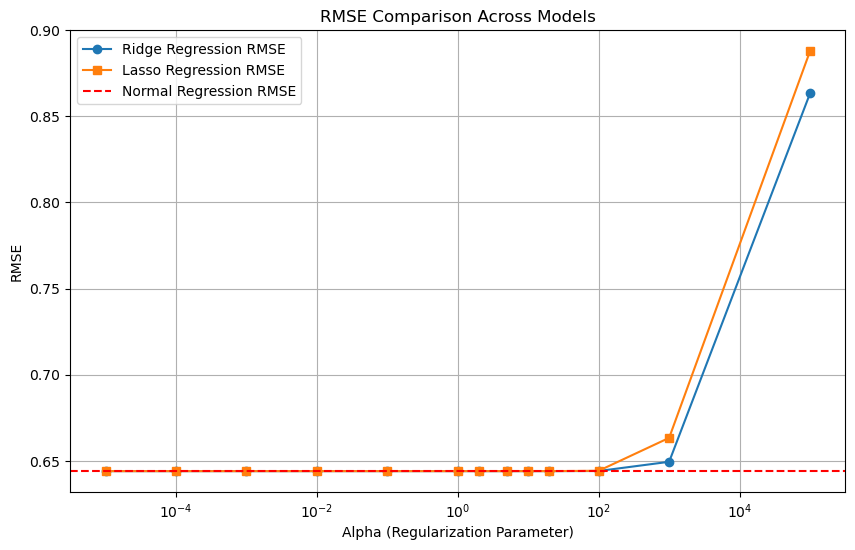

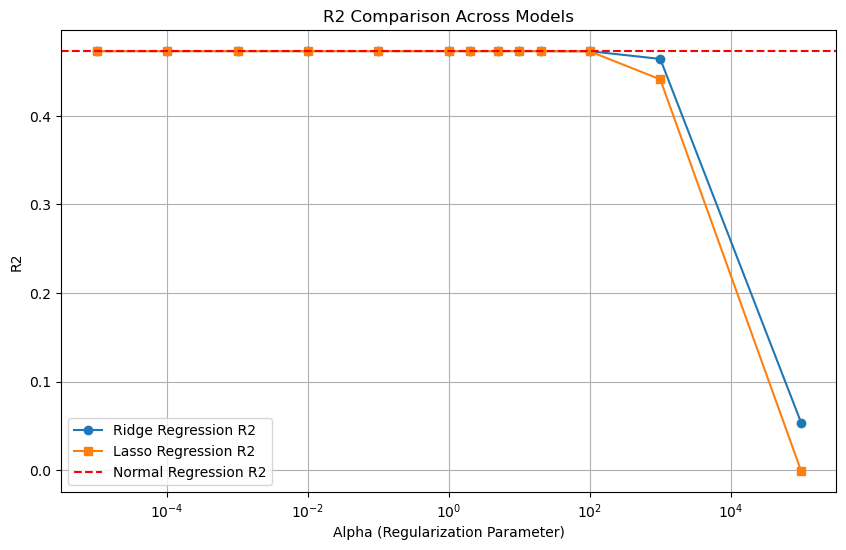

In [ ]:
X = np.array([
    Q8dfgreater10[1],
    Q8dfgreater10[2],
    Q8dfgreater10[7],
    Q8dfgreater10[15],
    Q8dfgreater10[16]
]).T

y = np.array(Q8dfgreater10['Average Rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

results=getKFresults(X_train,y_train)

results_df = pd.DataFrame(results, columns=['Model', 'Alpha', 'RMSE', 'R2'])

plot_results(results_df)

[0 4 1 5 2 3]
(array([3.89192073, 0.27267552, 0.23583586, 0.0692236 , 0.27394206,
       0.23699102]), 0.5572969530912241, 0.5945605051435738)


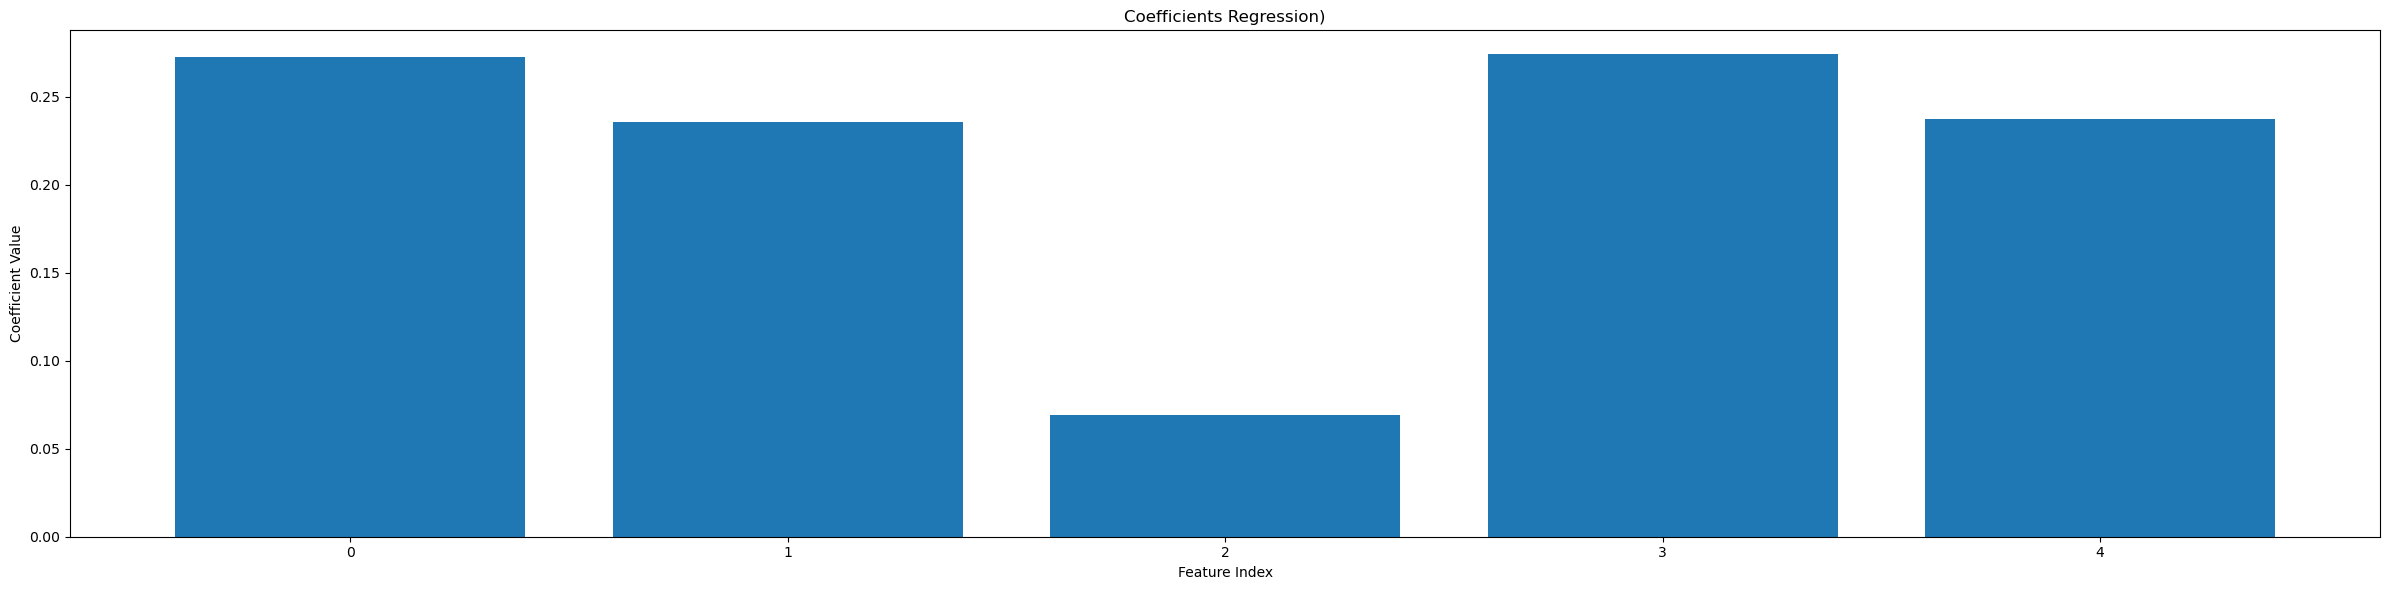

In [297]:
mybetas=getbetas(X_train,y_train,X_test,y_test)[0] 
indices = np.argsort(mybetas)[::-1] 
print(indices)  
print(getbetas(X_train,y_train,X_test,y_test))
plot_betas(getbetas(X_train,y_train,X_test,y_test)[0][1:])

#### 9. Build a regression model predicting average difficulty from all tags (the ones in the rmpCapstoneTags.csv) file. Make sure to include the R2and RMSE of this model. Which of these tags is most strongly predictive of average difficulty? Hint: Make sure to address collinearity concerns

In [298]:
Q9df=df_capstone[['Average Difficulty','Number of ratings']].join(tagsdf, how='inner')

In [299]:
Q9df.head(2)

Average Difficulty  Number of ratings  0   1  2  3  4  5  6  7  ...  10  \
3                 3.5               10.0  6   3  0  0  2  4  2  1  ...   0   
5                 3.3               22.0  8  13  1  3  2  3  2  1  ...   0   

   11  12  13  14  15  16  17  18  19  
3   2   1   0   0   0   0   0   1   0  
5   7   3   0   0   0   3   0   1   3  

[2 rows x 22 columns]

In [300]:
Q9df.dropna(inplace=True)

In [301]:
Q9df.head(2)

Average Difficulty  Number of ratings  0   1  2  3  4  5  6  7  ...  10  \
3                 3.5               10.0  6   3  0  0  2  4  2  1  ...   0   
5                 3.3               22.0  8  13  1  3  2  3  2  1  ...   0   

   11  12  13  14  15  16  17  18  19  
3   2   1   0   0   0   0   0   1   0  
5   7   3   0   0   0   3   0   1   3  

[2 rows x 22 columns]

In [302]:
for i in Q9df.columns[2:]:
    Q9df[i] = Q9df[i].div(Q9df['Number of ratings'])

In [303]:
Q9df.head(2)

Average Difficulty  Number of ratings         0         1         2  \
3                 3.5               10.0  0.600000  0.300000  0.000000   
5                 3.3               22.0  0.363636  0.590909  0.045455   

          3         4         5         6         7  ...   10        11  \
3  0.000000  0.200000  0.400000  0.200000  0.100000  ...  0.0  0.200000   
5  0.136364  0.090909  0.136364  0.090909  0.045455  ...  0.0  0.318182   

         12   13   14   15        16   17        18        19  
3  0.100000  0.0  0.0  0.0  0.000000  0.0  0.100000  0.000000  
5  0.136364  0.0  0.0  0.0  0.136364  0.0  0.045455  0.136364  

[2 rows x 22 columns]

In [304]:
Q9dfgreater10=Q9df[Q9df['Number of ratings'] >= 10]

In [305]:
Q9dfgreater10.head(2)

Average Difficulty  Number of ratings         0         1         2  \
3                 3.5               10.0  0.600000  0.300000  0.000000   
5                 3.3               22.0  0.363636  0.590909  0.045455   

          3         4         5         6         7  ...   10        11  \
3  0.000000  0.200000  0.400000  0.200000  0.100000  ...  0.0  0.200000   
5  0.136364  0.090909  0.136364  0.090909  0.045455  ...  0.0  0.318182   

         12   13   14   15        16   17        18        19  
3  0.100000  0.0  0.0  0.0  0.000000  0.0  0.100000  0.000000  
5  0.136364  0.0  0.0  0.0  0.136364  0.0  0.045455  0.136364  

[2 rows x 22 columns]

In [352]:
Q9dfgreater10.corr()

Average Difficulty  Number of ratings         0         1  \
Average Difficulty            1.000000          -0.004543  0.702036 -0.266645   
Number of ratings            -0.004543           1.000000 -0.050264 -0.006367   
0                             0.702036          -0.050264  1.000000 -0.279184   
1                            -0.266645          -0.006367 -0.279184  1.000000   
2                            -0.382346           0.072052 -0.432823  0.241074   
3                             0.263817          -0.048046  0.222176 -0.093648   
4                            -0.099905          -0.015655 -0.094804  0.159847   
5                             0.347147          -0.016248  0.318143 -0.244874   
6                             0.321062          -0.015150  0.260375 -0.156233   
7                            -0.299912           0.067040 -0.333427  0.191812   
8                             0.108180          -0.025200  0.091535 -0.116659   
9                             0.033233           0.040420 -0.128916  0.120023   
10                            0.144322          -0.044974  0.196800  0.048142   
11                           -0.306598          -0.002330 -0.291843  0.157828   
12                           -0.319765           0.069560 -0.279221  0.043984   
13                            0.335738           0.018782  0.246531 -0.267705   
14                            0.027992          -0.036706  0.051359 -0.182395   
15                           -0.252756           0.081023 -0.321189  0.015235   
16                           -0.360256           0.013673 -0.410780  0.309357   
17                           -0.205481           0.035563 -0.172267 -0.086934   
18                           -0.007787          -0.025148  0.028694 -0.028624   
19                            0.268917          -0.041681  0.246206 -0.346267   

                           2         3         4         5         6  \
Average Difficulty -0.382346  0.263817 -0.099905  0.347147  0.321062   
Number of ratings   0.072052 -0.048046 -0.015655 -0.016248 -0.015150   
0                  -0.432823  0.222176 -0.094804  0.318143  0.260375   
1                   0.241074 -0.093648  0.159847 -0.244874 -0.156233   
2                   1.000000 -0.264006 -0.023937 -0.263143 -0.264172   
3                  -0.264006  1.000000  0.099859  0.021023  0.007098   
4                  -0.023937  0.099859  1.000000 -0.034340 -0.093931   
5                  -0.263143  0.021023 -0.034340  1.000000  0.168757   
6                  -0.264172  0.007098 -0.093931  0.168757  1.000000   
7                   0.426323 -0.160425  0.058516 -0.269544 -0.261014   
8                  -0.130207  0.111660 -0.053049  0.108581  0.022489   
9                   0.075294 -0.174342 -0.106775 -0.059616 -0.013180   
10                 -0.155054  0.209634  0.049101 -0.000954  0.091560   
11                  0.073372 -0.156828 -0.059450 -0.104150 -0.106454   
12                  0.215042 -0.162631 -0.017662 -0.147249 -0.230603   
13                 -0.195254  0.024215 -0.189373  0.176475  0.093755   
14                 -0.132421  0.030474 -0.069110  0.033567 -0.094752   
15                  0.330634 -0.129362 -0.054041 -0.134582 -0.290231   
16                  0.357273 -0.287732 -0.048333 -0.246984 -0.148499   
17                 -0.026556 -0.104214 -0.055444 -0.053867 -0.056439   
18                 -0.066091 -0.028973  0.134431 -0.062529 -0.009198   
19                 -0.277722  0.135545 -0.152808  0.215648  0.010998   

                           7  ...        10        11        12        13  \
Average Difficulty -0.299912  ...  0.144322 -0.306598 -0.319765  0.335738   
Number of ratings   0.067040  ... -0.044974 -0.002330  0.069560  0.018782   
0                  -0.333427  ...  0.196800 -0.291843 -0.279221  0.246531   
1                   0.191812  ...  0.048142  0.157828  0.043984 -0.267705   
2                   0.426323  ... -0.155054  0.073372  0.215042 -0.195254   
3                  -0.160425  ...  0.

In [306]:
corrgreater40=Q9dfgreater10.corr()[Q9dfgreater10.corr()>0.30]
[i for i in list(corrgreater40[corrgreater40.notnull()].stack().index) if i[0]!=i[1]]

[('Average Difficulty', 0),
 ('Average Difficulty', 5),
 ('Average Difficulty', 6),
 ('Average Difficulty', 13),
 (0, 'Average Difficulty'),
 (0, 5),
 (1, 16),
 (2, 7),
 (2, 15),
 (2, 16),
 (5, 'Average Difficulty'),
 (5, 0),
 (6, 'Average Difficulty'),
 (7, 2),
 (7, 15),
 (13, 'Average Difficulty'),
 (15, 2),
 (15, 7),
 (16, 1),
 (16, 2)]

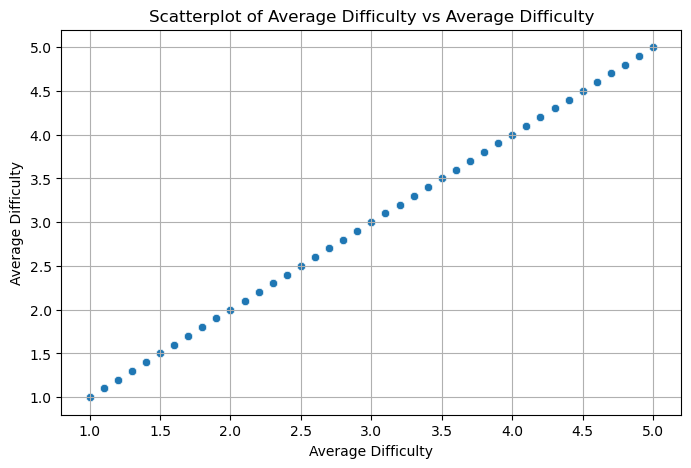

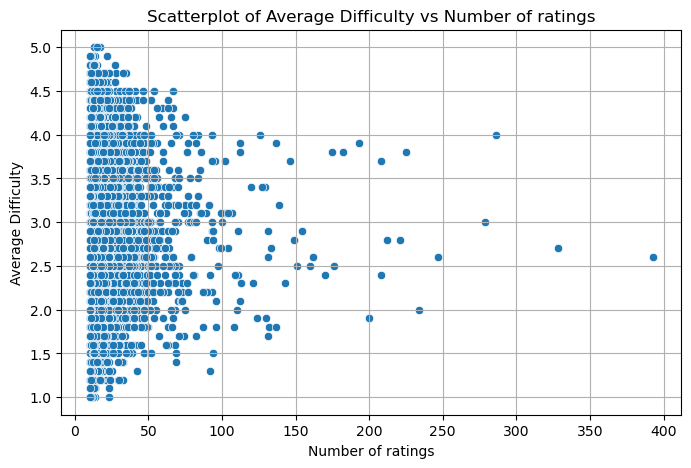

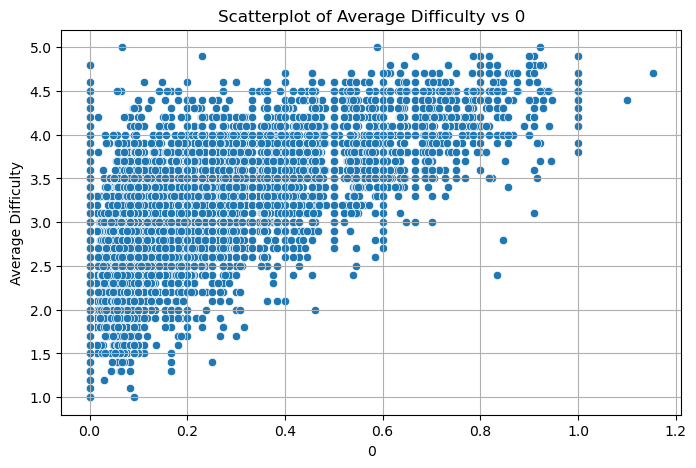

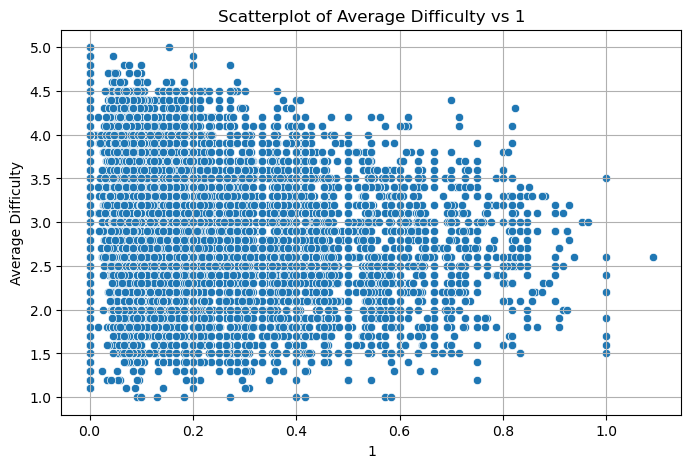

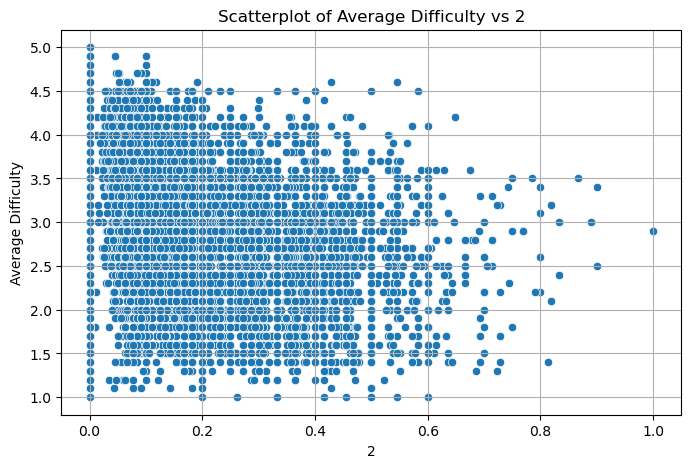

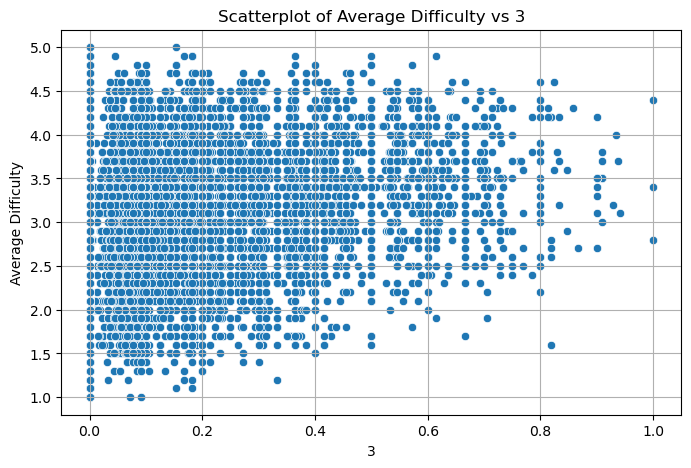

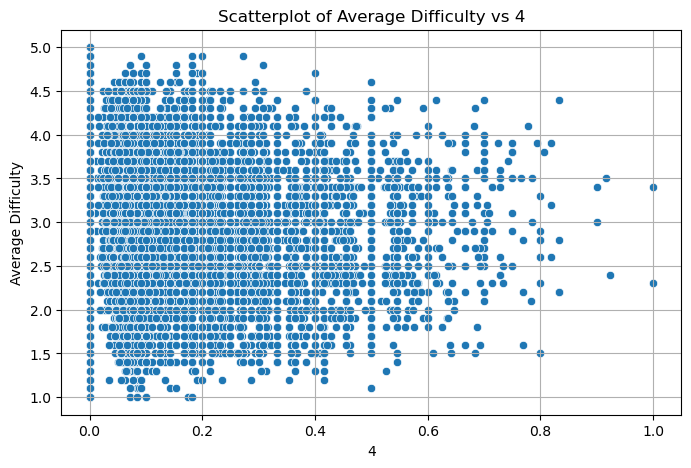

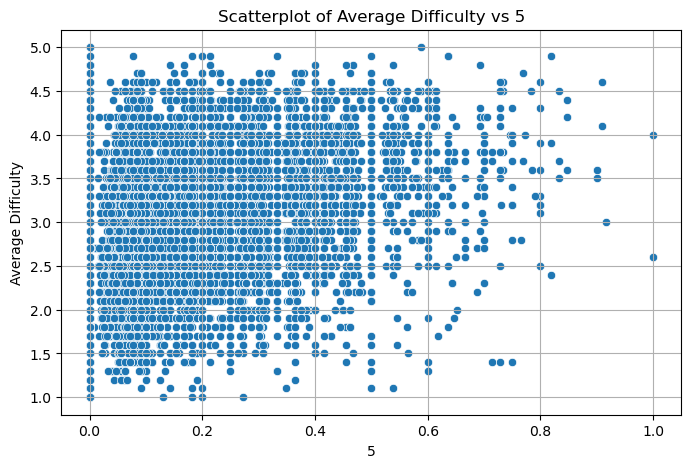

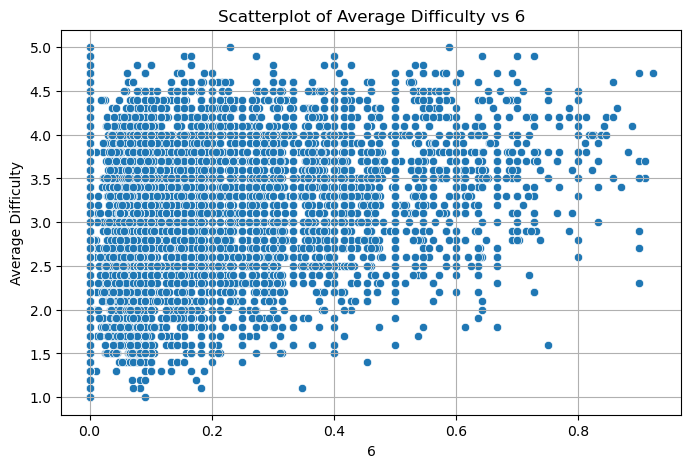

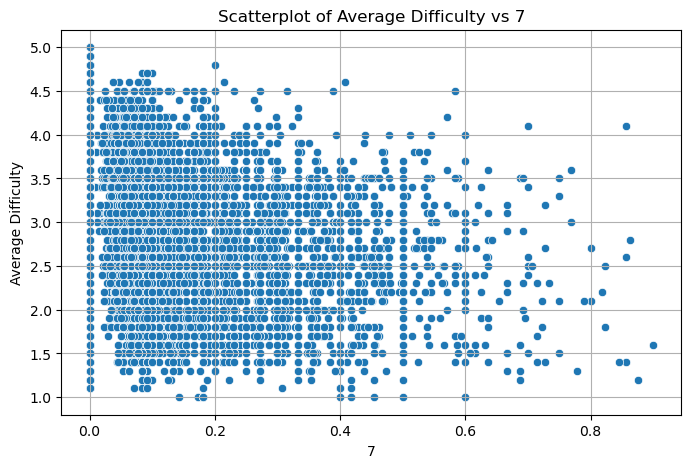

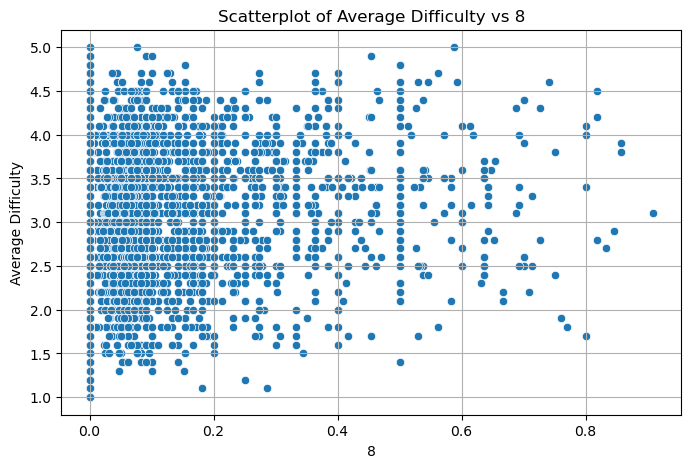

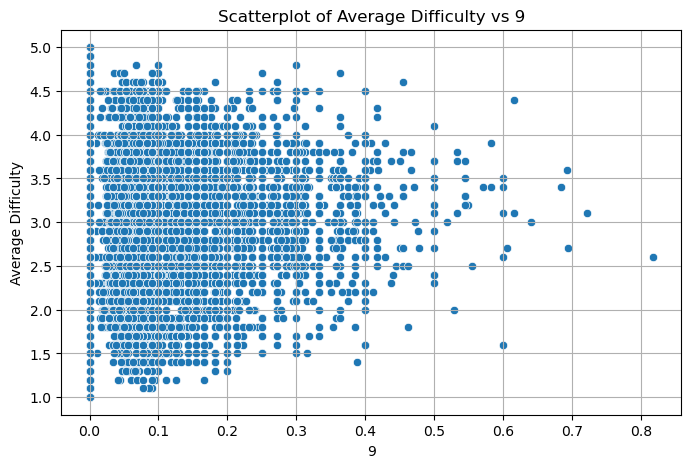

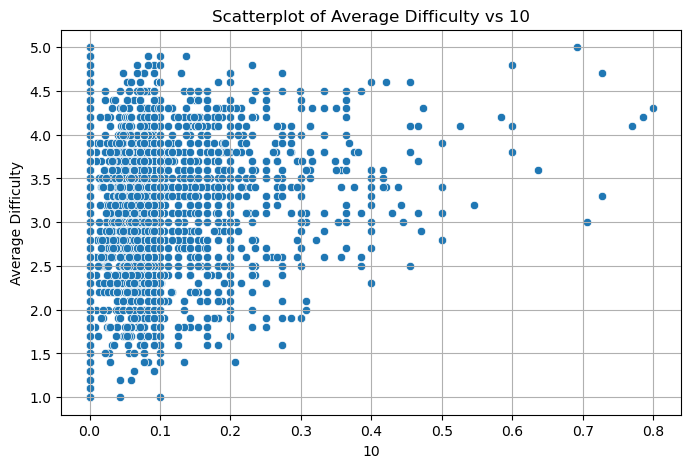

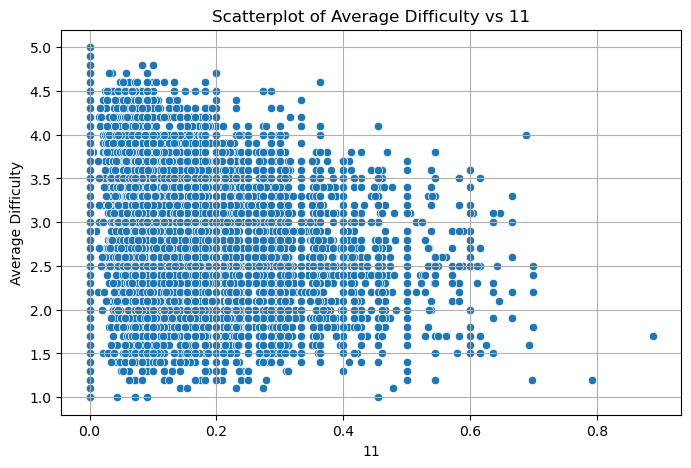

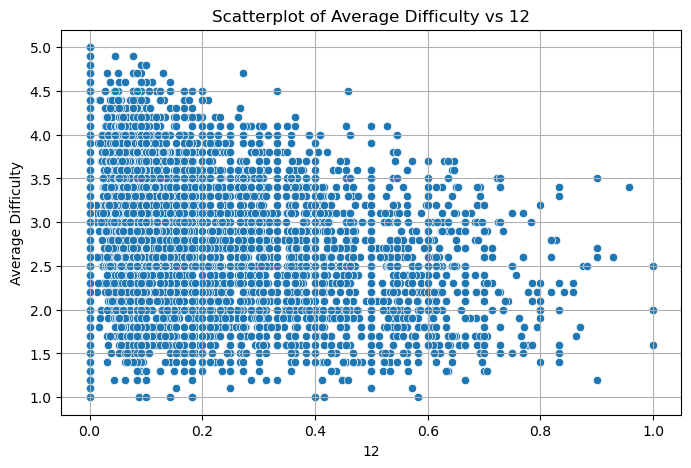

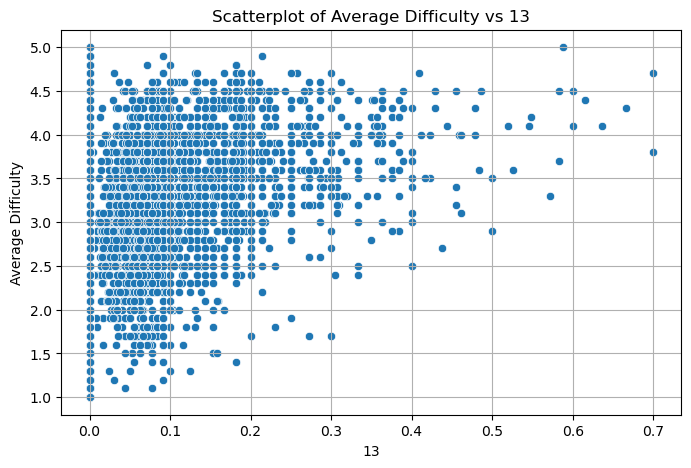

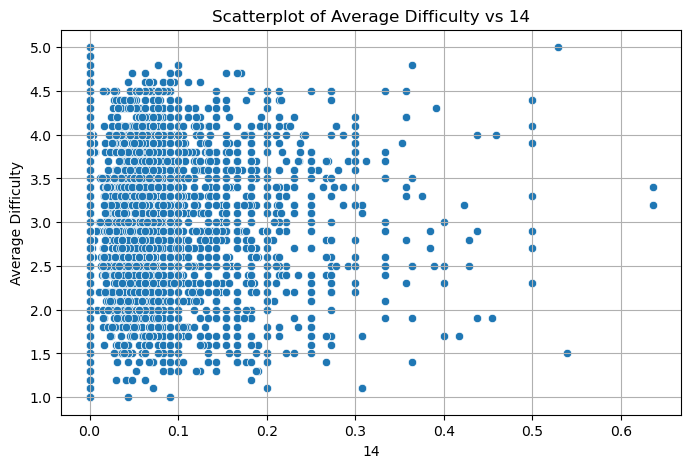

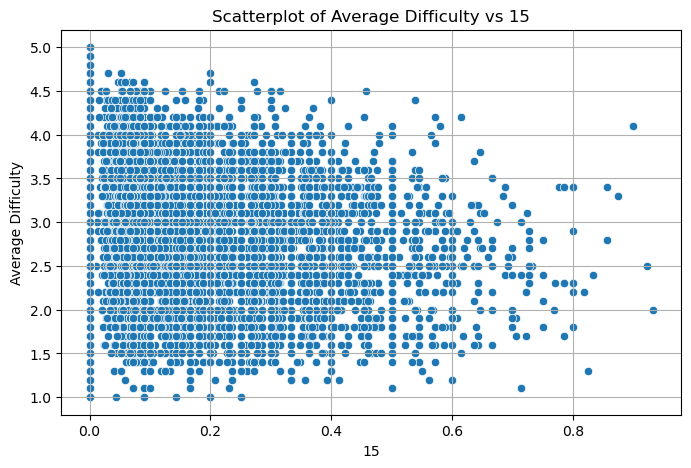

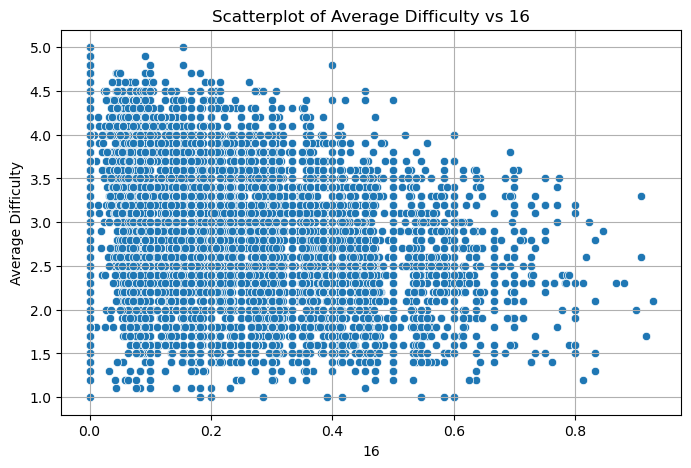

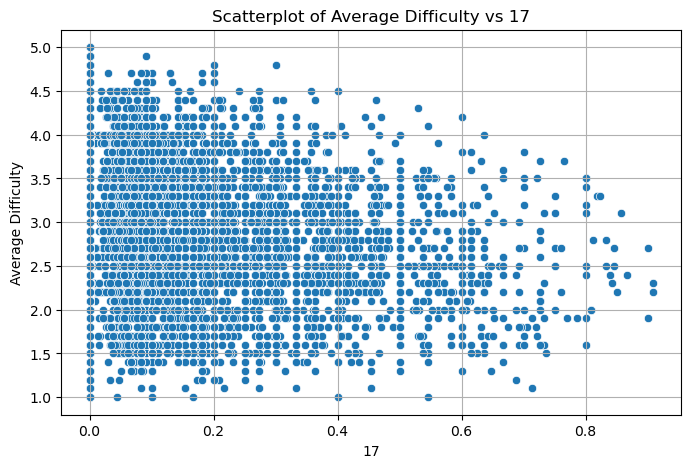

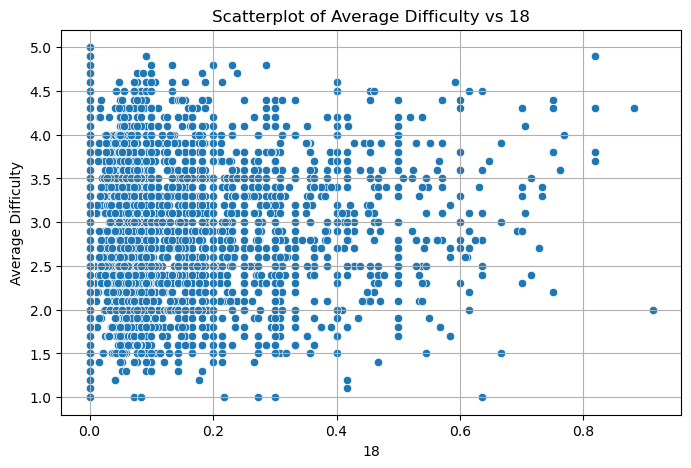

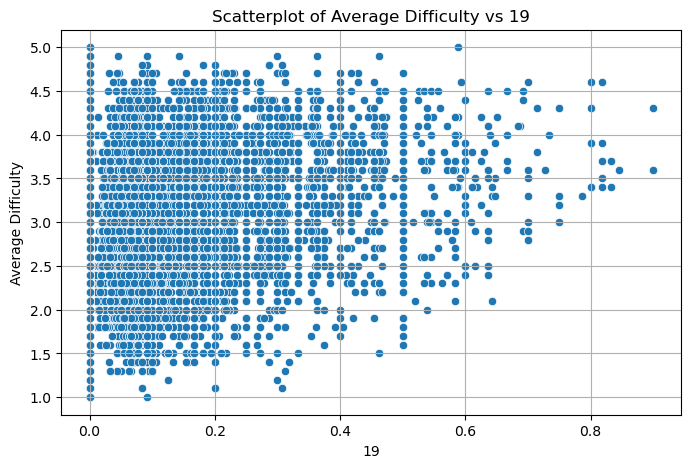

In [375]:
dependent_var='Average Difficulty'
for var in Q9dfgreater10.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=Q9dfgreater10[var], y=Q9dfgreater10[dependent_var])
    plt.title(f'Scatterplot of {dependent_var} vs {var}')
    plt.xlabel(var)
    plt.ylabel(dependent_var)
    plt.grid(True)
    plt.show()

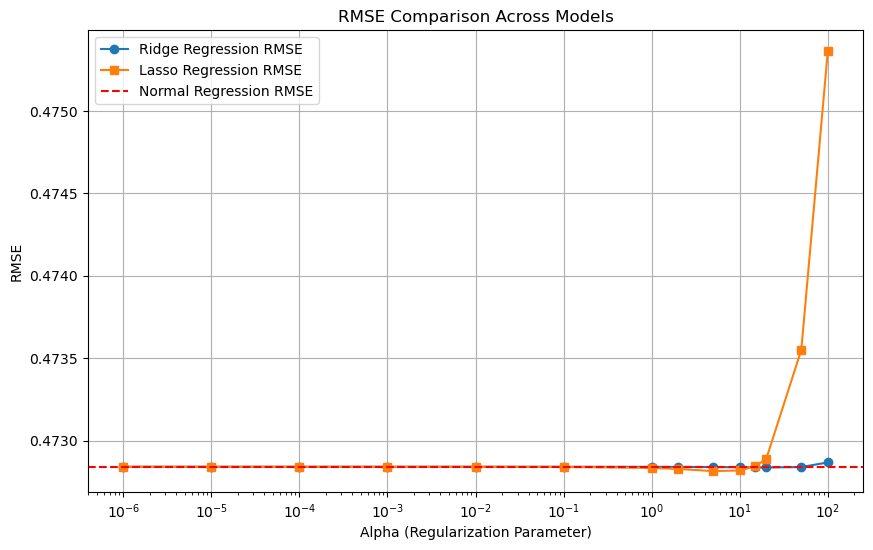

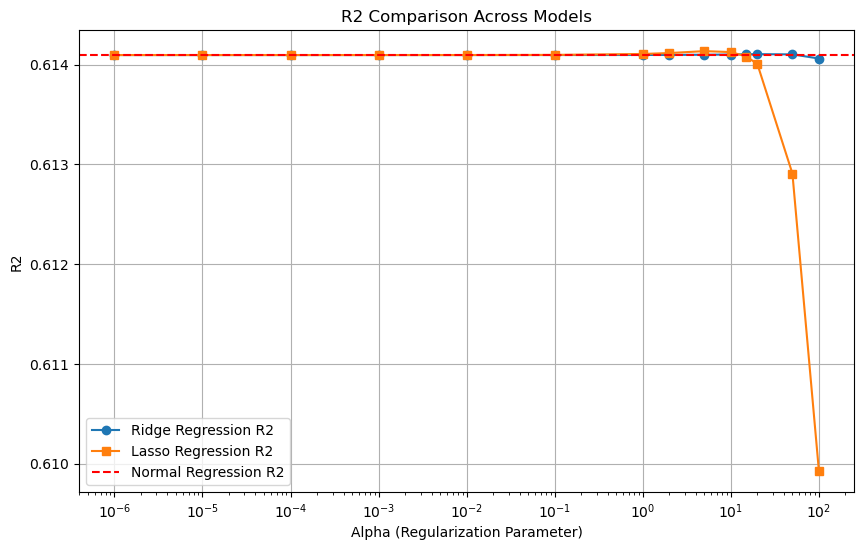

In [369]:
X = np.array([
    Q9dfgreater10[0],
    Q9dfgreater10[1],
    Q9dfgreater10[2],
    Q9dfgreater10[3],
    Q9dfgreater10[4],
    Q9dfgreater10[5],
    Q9dfgreater10[6],
    Q9dfgreater10[7],
    Q9dfgreater10[8],
    Q9dfgreater10[9],
    Q9dfgreater10[10],
    Q9dfgreater10[11],
    Q9dfgreater10[12],
    Q9dfgreater10[13],
    Q9dfgreater10[14],
    Q9dfgreater10[15],
    Q9dfgreater10[16],
    Q9dfgreater10[17],
    Q9dfgreater10[18],
    Q9dfgreater10[19],
]).T

y = np.array(Q9dfgreater10['Average Difficulty'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


results=getKFresults(X_train,y_train,alphas=np.array([0.000001,0.00001,0.0001,0.001,0.01,0.1,1,2,5,10,15,20,50,100]))

results_df = pd.DataFrame(results, columns=['Model', 'Alpha', 'RMSE', 'R2'])

plot_results(results_df,alphas=np.array([0.000001,0.00001,0.0001,0.001,0.01,0.1,1,2,5,10,15,20,50,100]))

[ 0  1 14 10  7  4  6 20 16  9 11  8  5 19  2  3 15 17 18 13 12]
[ 2.96004827e+00  3.72809888e-01  1.09888274e-01  9.85424701e-02
  8.23529450e-02  7.53572421e-02  6.93894588e-02  2.88252816e-02
  1.72268189e-02  9.21291806e-03  2.07931238e-03 -1.13416434e-03
 -8.35253711e-03 -8.76424086e-03 -1.13774457e-02 -1.80216443e-02
 -3.51961157e-02 -4.75956917e-02 -5.80762809e-02 -7.64531072e-02
 -8.39852445e-02]
(array([ 2.96004827e+00,  3.72809888e-01, -1.13774457e-02, -1.80216443e-02,
        7.53572421e-02, -8.35253711e-03,  6.93894588e-02,  8.23529450e-02,
       -1.13416434e-03,  9.21291806e-03,  9.85424701e-02,  2.07931238e-03,
       -8.39852445e-02, -7.64531072e-02,  1.09888274e-01, -3.51961157e-02,
        1.72268189e-02, -4.75956917e-02, -5.80762809e-02, -8.76424086e-03,
        2.88252816e-02]), 0.47184195611081453, 0.5990675536415879)
(array([ 2.96004827e+00,  3.72116041e-01, -1.18840562e-02, -1.87854031e-02,
        7.58716091e-02, -9.19694073e-03,  6.96475242e-02,  8.28987520e-02

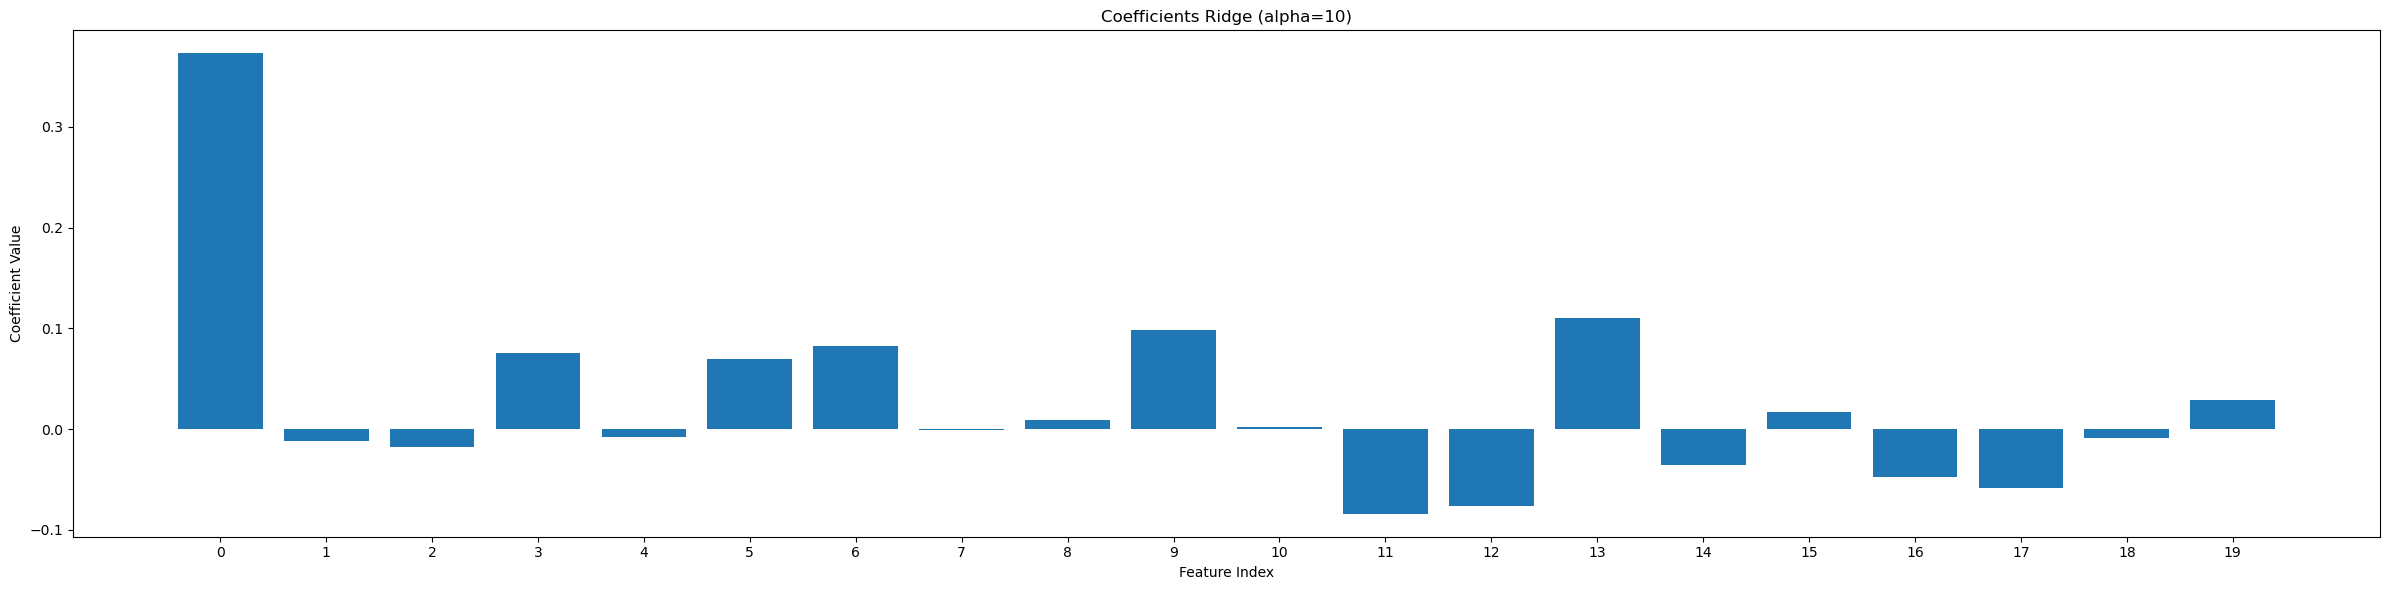

In [370]:
mybetas=getbetaslasso(X_train,y_train,X_test,y_test)[0]
indices = np.argsort(mybetas)[::-1]
print(indices) 
print(mybetas[indices]) 
print(getbetaslasso(X_train,y_train,X_test,y_test))
print(getbetas(X_train,y_train,X_test,y_test))
plot_betas(getbetaslasso(X_train,y_train,X_test,y_test)[0][1:],[i.name for i in [
    Q9dfgreater10[0],
    Q9dfgreater10[1],
    Q9dfgreater10[2],
    Q9dfgreater10[3],
    Q9dfgreater10[4],
    Q9dfgreater10[5],
    Q9dfgreater10[6],
    Q9dfgreater10[7],
    Q9dfgreater10[8],
    Q9dfgreater10[9],
    Q9dfgreater10[10],
    Q9dfgreater10[11],
    Q9dfgreater10[12],
    Q9dfgreater10[13],
    Q9dfgreater10[14],
    Q9dfgreater10[15],
    Q9dfgreater10[16],
    Q9dfgreater10[17],
    Q9dfgreater10[18],
    Q9dfgreater10[19],
]],'Lasso')


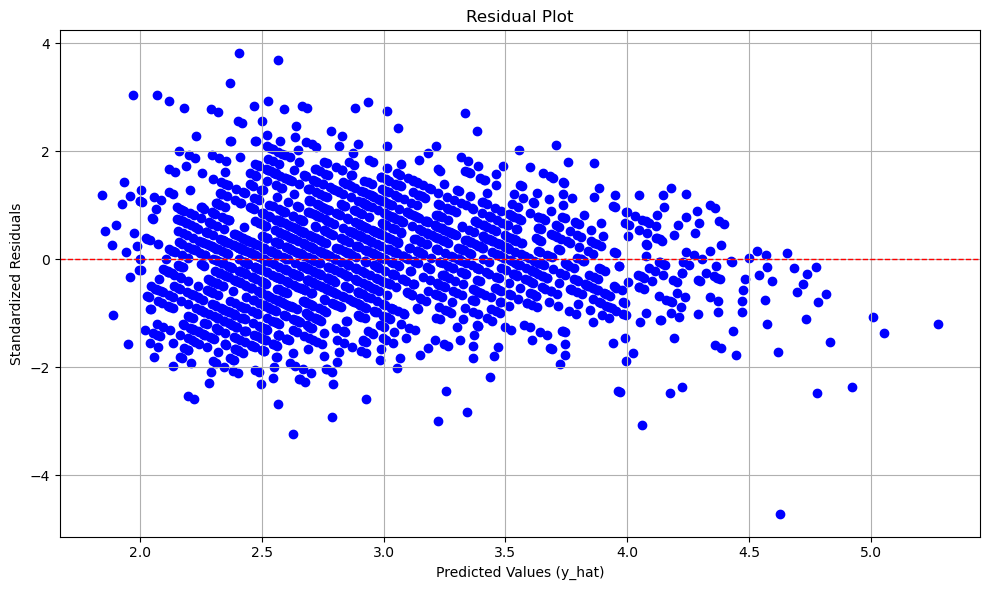

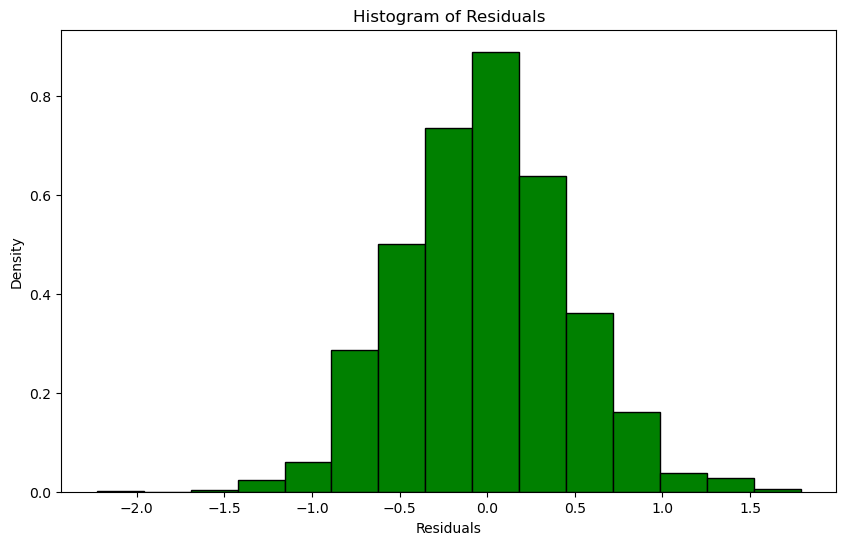

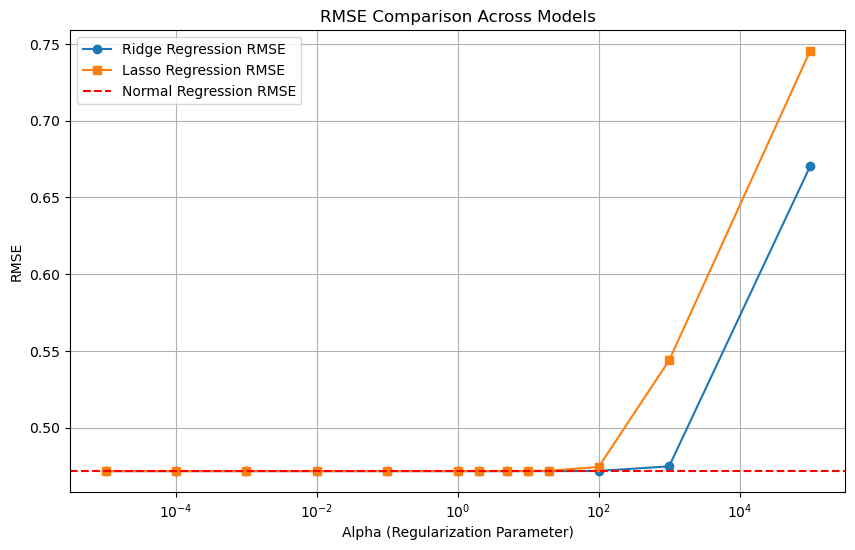

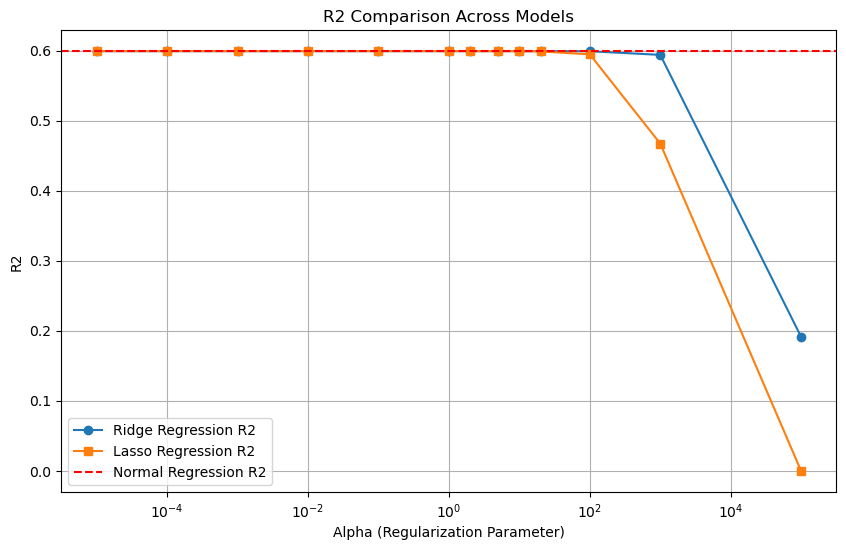

In [371]:
results=getfinalresults(X_train,y_train,X_test,y_test)
results_df = pd.DataFrame(results, columns=['Model', 'Alpha', 'RMSE', 'R2'])
plot_results(results_df)

In [348]:
results_df

Model         Alpha      RMSE        R2
0    Ridge       0.00001  0.471743  0.599236
1    Ridge       0.00010  0.471743  0.599236
2    Ridge       0.00100  0.471743  0.599236
3    Ridge       0.01000  0.471743  0.599236
4    Ridge       0.10000  0.471743  0.599236
5    Ridge       1.00000  0.471744  0.599235
6    Ridge       2.00000  0.471744  0.599233
7    Ridge       5.00000  0.471747  0.599229
8    Ridge      10.00000  0.471751  0.599222
9    Ridge      20.00000  0.471761  0.599206
10   Ridge     100.00000  0.471858  0.599040
11   Ridge    1000.00000  0.474868  0.593909
12   Ridge  100000.00000  0.670219  0.191069
13   Lasso       0.00001  0.471743  0.599236
14   Lasso       0.00010  0.471743  0.599236
15   Lasso       0.00100  0.471743  0.599236
16   Lasso       0.01000  0.471743  0.599236
17   Lasso       0.10000  0.471744  0.599235
18   Lasso       1.00000  0.471750  0.599223
19   Lasso       2.00000  0.471759  0.599209
20   Lasso       5.00000  0.471786  0.599163
21   Lasso      10.00000  0.471842  0.599068
22   Lasso      20.00000  0.471992  0.598812
23   Lasso     100.00000  0.474475  0.594580
24   Lasso    1000.00000  0.543907  0.467244
25   Lasso  100000.00000  0.745353 -0.000465
26  Normal           NaN  0.471743  0.599236

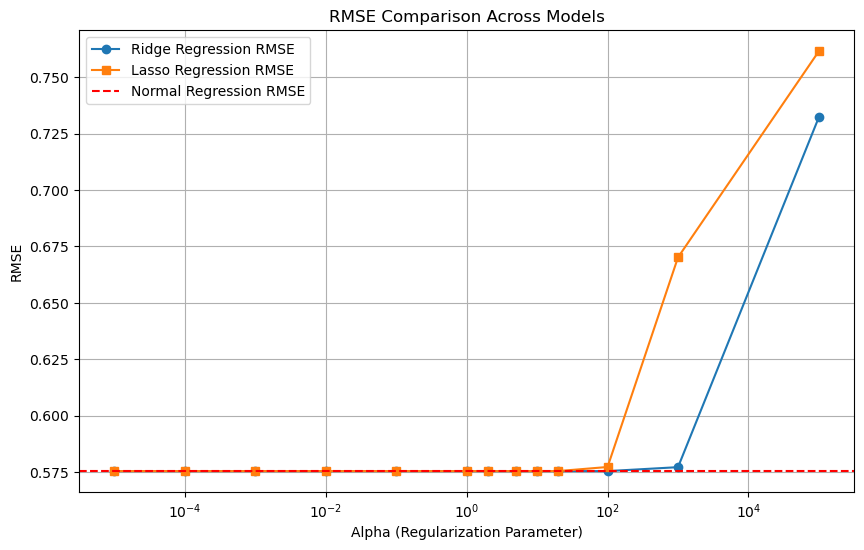

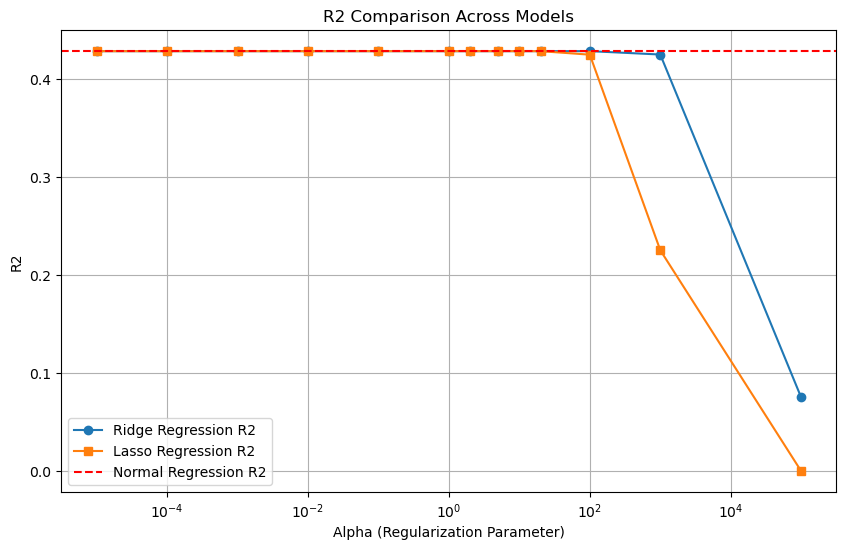

In [310]:
X = np.array([
    Q9dfgreater10[3],
    Q9dfgreater10[4],
    Q9dfgreater10[5],
    Q9dfgreater10[6],
    Q9dfgreater10[8],
    Q9dfgreater10[9],
    Q9dfgreater10[10],
    Q9dfgreater10[11],
    Q9dfgreater10[12],
    Q9dfgreater10[13],
    Q9dfgreater10[14],
    Q9dfgreater10[17],
    Q9dfgreater10[18],
]).T

y = np.array(Q9dfgreater10['Average Difficulty'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

results=getKFresults(X_train,y_train)

results_df = pd.DataFrame(results, columns=['Model', 'Alpha', 'RMSE', 'R2'])

plot_results(results_df)

[ 0 10  3  1  4  6  7  5 13 11  2 12  9  8]
(array([ 2.96004827,  0.13592422, -0.0495007 ,  0.16648441,  0.13424572,
        0.01950259,  0.05865344,  0.05125611, -0.16469401, -0.14173879,
        0.18065919, -0.02065496, -0.09568143,  0.0033788 ]), 0.5661728433392119, 0.4227337574455461)


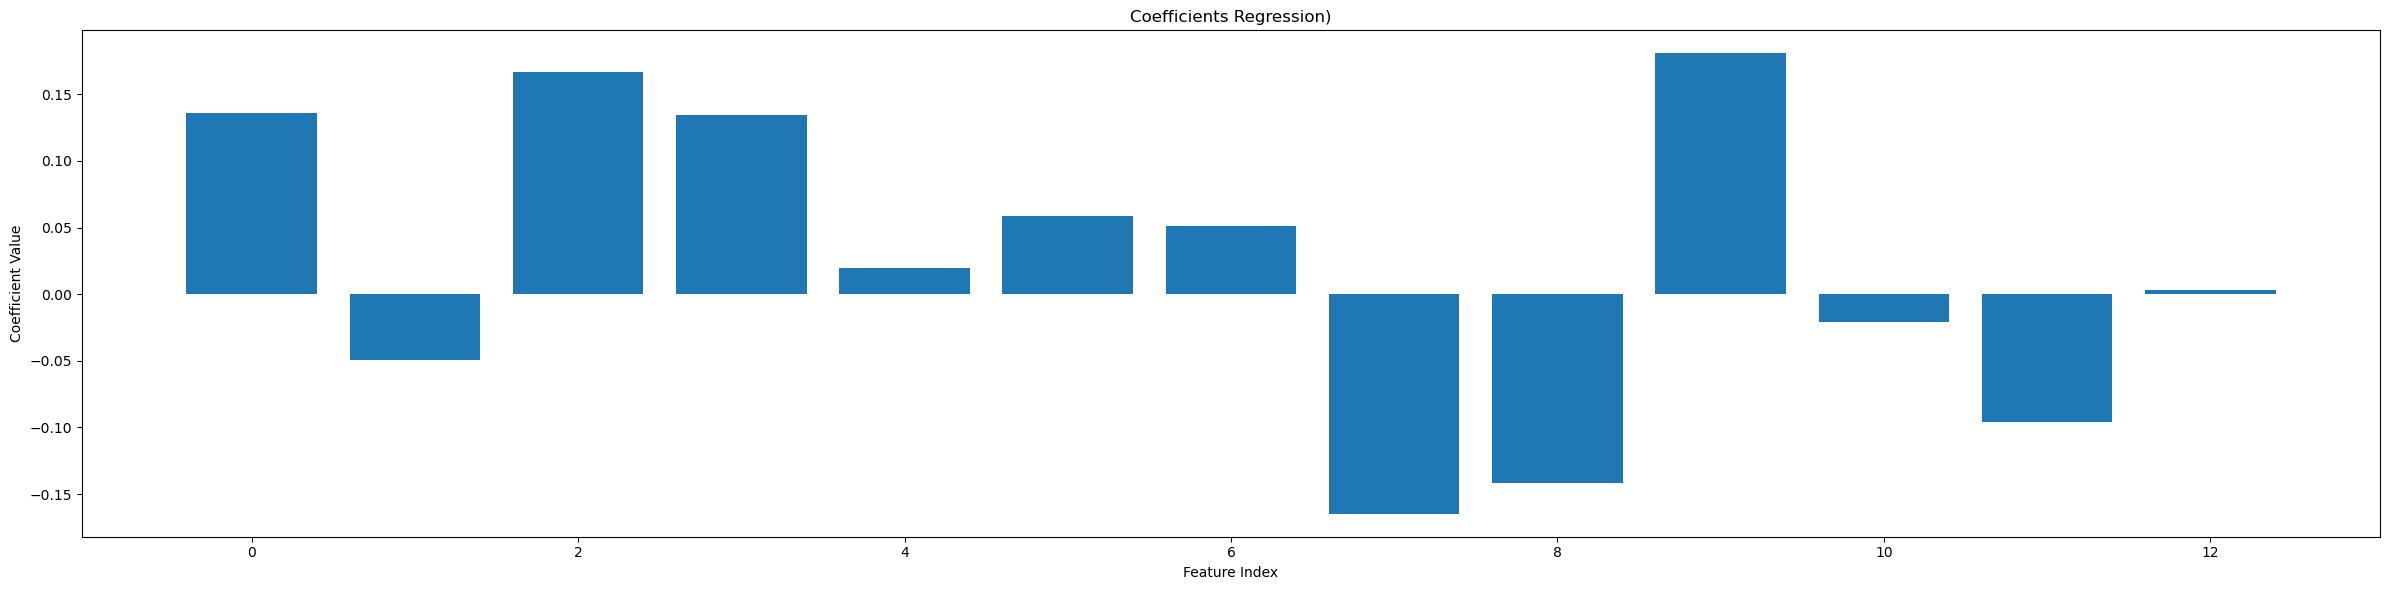

In [311]:
mybetas=getbetas(X_train,y_train,X_test,y_test)[0]
indices = np.argsort(mybetas)[::-1]
print(indices) 
print(getbetas(X_train,y_train,X_test,y_test))
plot_betas(getbetas(X_train,y_train,X_test,y_test)[0][1:])

In [354]:
Q9dfgreater10.corr()

Average Difficulty  Number of ratings         0         1  \
Average Difficulty            1.000000          -0.004543  0.702036 -0.266645   
Number of ratings            -0.004543           1.000000 -0.050264 -0.006367   
0                             0.702036          -0.050264  1.000000 -0.279184   
1                            -0.266645          -0.006367 -0.279184  1.000000   
2                            -0.382346           0.072052 -0.432823  0.241074   
3                             0.263817          -0.048046  0.222176 -0.093648   
4                            -0.099905          -0.015655 -0.094804  0.159847   
5                             0.347147          -0.016248  0.318143 -0.244874   
6                             0.321062          -0.015150  0.260375 -0.156233   
7                            -0.299912           0.067040 -0.333427  0.191812   
8                             0.108180          -0.025200  0.091535 -0.116659   
9                             0.033233           0.040420 -0.128916  0.120023   
10                            0.144322          -0.044974  0.196800  0.048142   
11                           -0.306598          -0.002330 -0.291843  0.157828   
12                           -0.319765           0.069560 -0.279221  0.043984   
13                            0.335738           0.018782  0.246531 -0.267705   
14                            0.027992          -0.036706  0.051359 -0.182395   
15                           -0.252756           0.081023 -0.321189  0.015235   
16                           -0.360256           0.013673 -0.410780  0.309357   
17                           -0.205481           0.035563 -0.172267 -0.086934   
18                           -0.007787          -0.025148  0.028694 -0.028624   
19                            0.268917          -0.041681  0.246206 -0.346267   

                           2         3         4         5         6  \
Average Difficulty -0.382346  0.263817 -0.099905  0.347147  0.321062   
Number of ratings   0.072052 -0.048046 -0.015655 -0.016248 -0.015150   
0                  -0.432823  0.222176 -0.094804  0.318143  0.260375   
1                   0.241074 -0.093648  0.159847 -0.244874 -0.156233   
2                   1.000000 -0.264006 -0.023937 -0.263143 -0.264172   
3                  -0.264006  1.000000  0.099859  0.021023  0.007098   
4                  -0.023937  0.099859  1.000000 -0.034340 -0.093931   
5                  -0.263143  0.021023 -0.034340  1.000000  0.168757   
6                  -0.264172  0.007098 -0.093931  0.168757  1.000000   
7                   0.426323 -0.160425  0.058516 -0.269544 -0.261014   
8                  -0.130207  0.111660 -0.053049  0.108581  0.022489   
9                   0.075294 -0.174342 -0.106775 -0.059616 -0.013180   
10                 -0.155054  0.209634  0.049101 -0.000954  0.091560   
11                  0.073372 -0.156828 -0.059450 -0.104150 -0.106454   
12                  0.215042 -0.162631 -0.017662 -0.147249 -0.230603   
13                 -0.195254  0.024215 -0.189373  0.176475  0.093755   
14                 -0.132421  0.030474 -0.069110  0.033567 -0.094752   
15                  0.330634 -0.129362 -0.054041 -0.134582 -0.290231   
16                  0.357273 -0.287732 -0.048333 -0.246984 -0.148499   
17                 -0.026556 -0.104214 -0.055444 -0.053867 -0.056439   
18                 -0.066091 -0.028973  0.134431 -0.062529 -0.009198   
19                 -0.277722  0.135545 -0.152808  0.215648  0.010998   

                           7  ...        10        11        12        13  \
Average Difficulty -0.299912  ...  0.144322 -0.306598 -0.319765  0.335738   
Number of ratings   0.067040  ... -0.044974 -0.002330  0.069560  0.018782   
0                  -0.333427  ...  0.196800 -0.291843 -0.279221  0.246531   
1                   0.191812  ...  0.048142  0.157828  0.043984 -0.267705   
2                   0.426323  ... -0.155054  0.073372  0.215042 -0.195254   
3                  -0.160425  ...  0.

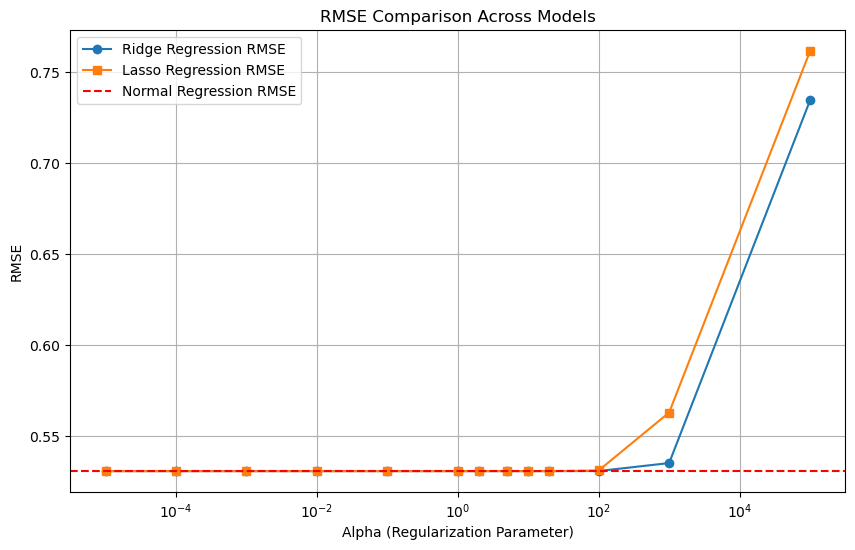

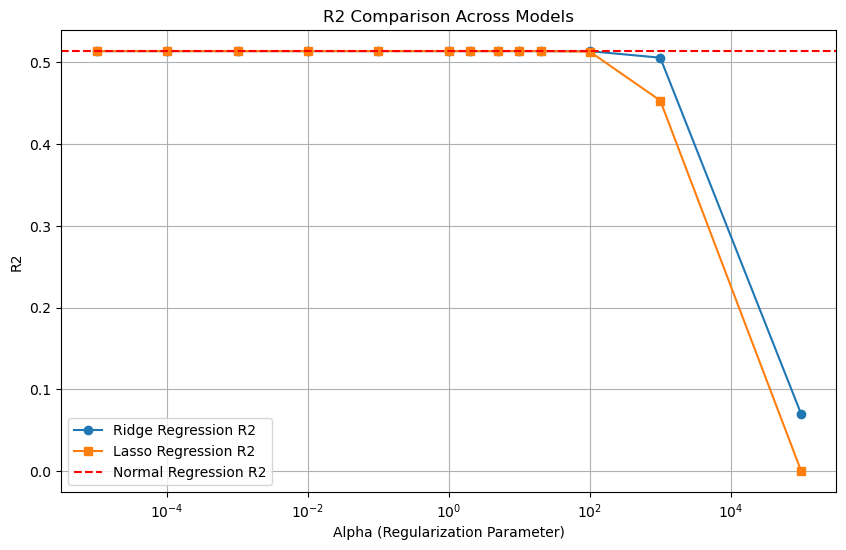

In [313]:
X = np.array([
    Q9dfgreater10[0],
    Q9dfgreater10[5],
]).T

y = np.array(Q9dfgreater10['Average Difficulty'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

results=getKFresults(X_train,y_train)

results_df = pd.DataFrame(results, columns=['Model', 'Alpha', 'RMSE', 'R2'])

plot_results(results_df)

[0 1 2]
(array([2.96004827, 0.50292441, 0.10627219]), 0.5326986173991374, 0.48897607679414146)


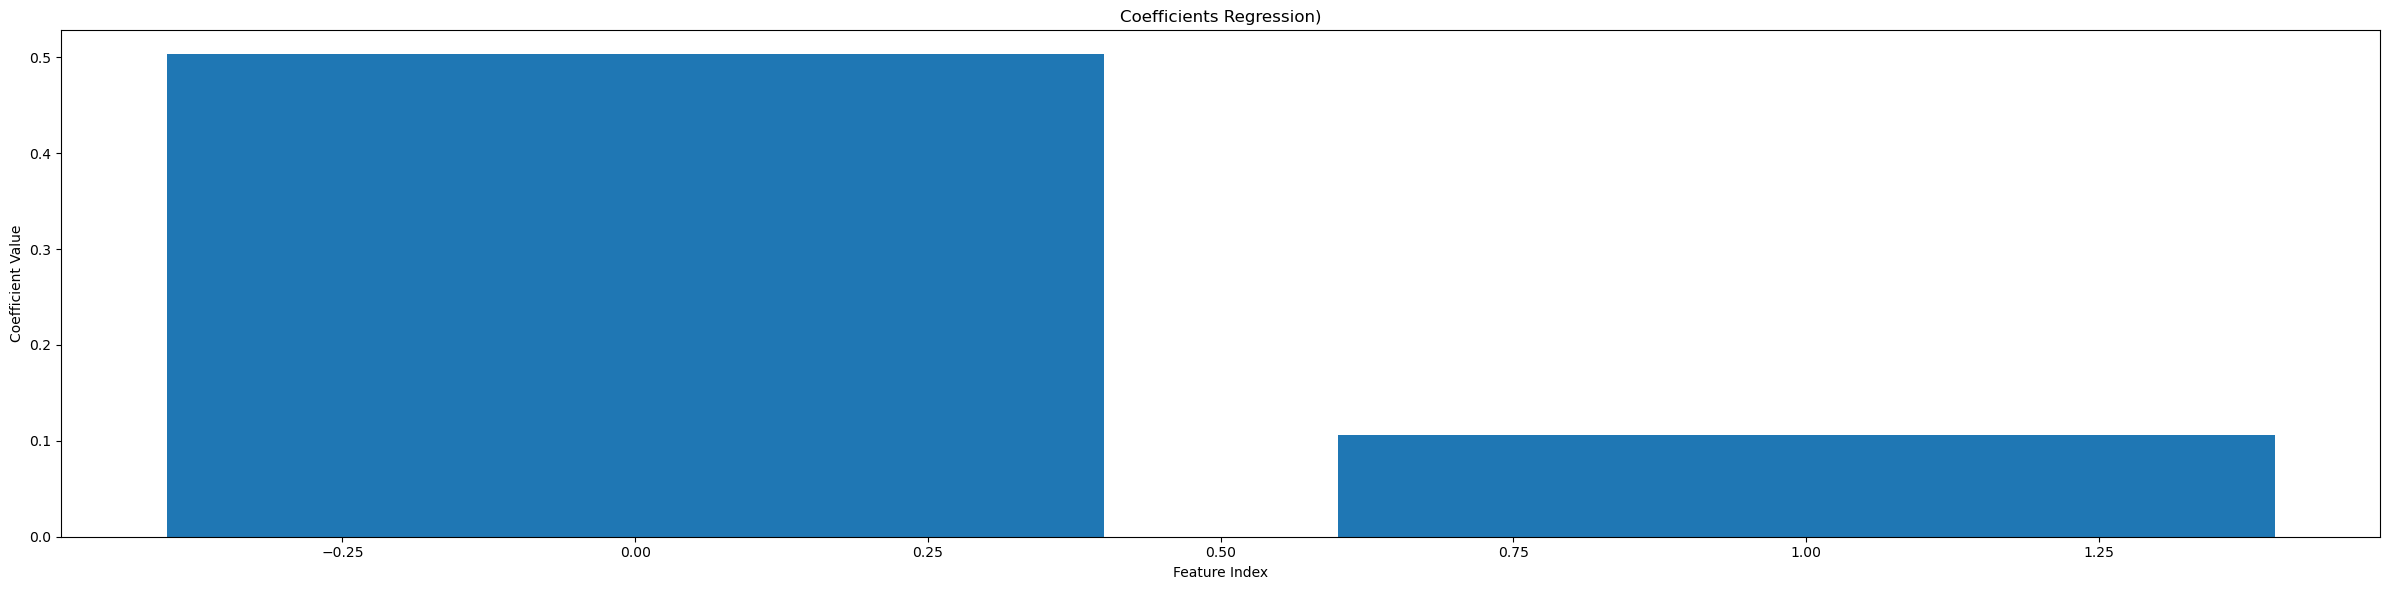

In [314]:
mybetas=getbetas(X_train,y_train,X_test,y_test)[0]
indices = np.argsort(mybetas)[::-1]
print(indices) 
print(getbetas(X_train,y_train,X_test,y_test))
plot_betas(getbetas(X_train,y_train,X_test,y_test)[0][1:])